In [22]:
import os 
import pandas as pd


# Metodos para el analisis de datos según corpus y representación de Doc

In [23]:
def MejoresResultadosClasificadorV1(cls):
    TFIDF_LEXICON = []
    TFIDF = []
    WEMB_LEXICON_TFIDF = []
    WEMB_LEXICON = []
    WEMB = []
    MULTIPLE_TFIDF = []
    MULTIPLE_WEMB = []
    LEXICON = []
    
    resultados = os.listdir(f"{cls}/")

    for i in resultados:
        if "TFIDF_LEXICON" in i:
            TFIDF_LEXICON.append(i)
        elif "MULTIPLE_TFIDF" in i:
            MULTIPLE_TFIDF.append(i)
        elif "MULTIPLE_WEMB" in i:
            MULTIPLE_WEMB.append(i)
        elif "WEMB_LEXICON_TFIDF" in i:
            WEMB_LEXICON_TFIDF.append(i)
        elif "WEMB_LEXICON" in i:
            WEMB_LEXICON.append(i)
        elif "WEMB" in i:
            WEMB.append(i)
        elif "TFIDF" in i:
            TFIDF.append(i)
        elif "LEXICON" in i:
            LEXICON.append(i)
    return  TFIDF, TFIDF_LEXICON, WEMB, WEMB_LEXICON, WEMB_LEXICON_TFIDF, MULTIPLE_TFIDF, MULTIPLE_WEMB, LEXICON


In [24]:
def MejoresResultadosRepresentacionCorpus(cls, representacion):
    list_corpus  = []
    info_res = []
    max_acc = 0 
    doc = ""
    for i in representacion:    
        f = open(f'{cls}/{i}','r')
        datos = list(f)
        acc = datos[0].split(" ")
        acc = float(acc[2]) 
        
        tiempo = datos[4].split(" ")[4]
        tiempo = float(tiempo) 
        
        corpus = i.split("_")
        corpus = corpus[0]
        if corpus not in list_corpus:
            list_corpus.append(corpus)
            data_corpus = {
                "corpus":corpus,
                "max_acc":acc,
                "doc":i,
                "tiempo":tiempo
            }
            info_res.append(data_corpus)
        elif corpus in list_corpus:
            index = list_corpus.index(corpus)
            if acc > info_res[index]["max_acc"]:
                info_res[index]["max_acc"] = acc
                info_res[index]["doc"] = i
        if acc > max_acc:
            max_acc = acc
            doc = i
            
    for j in info_res:
        print("###################################" )
        print(j["corpus"])
        print(round(j["max_acc"], 3))
        print(j["doc"])
        print(round(j["tiempo"],0))
        print("###################################" )
        
    print("Nombre documento: ", doc) 
    print("Mejor Accuracy: ", max_acc) 
    return doc, max_acc

In [25]:
def FiltroCorpus(corpus, resultados):
    rutas_corpus = []
    for i in resultados:
        if corpus in i:
            rutas_corpus.append(i)
    return rutas_corpus

In [26]:
def FiltradoTipoFiltro(resultados):
    rutas_filtro = []
    for i in resultados:
        if "NoFiltrado" in i:
            rutas_filtro.append(i)
        if "Filtrado_spacy" in i:
            rutas_filtro.append(i)
        if "Filtrado_patrones" in i:
            rutas_filtro.append(i)
    return rutas_filtro

In [27]:
def GetResultados(rutas, cls, corpus, representacion):
    resultados = [] 
    for i in rutas:
        f = open(f'{cls}/{i}','r')
        datos = list(f)
        acc = datos[0].split(" ")
        acc = float(acc[2]) 
        
        recall = datos[1].replace(" \n","").split(":")
        recall = float(recall[1])
    
        precc = datos[1].replace(" \n","").split(":")
        precc = float(precc[1])
        
        f1 = datos[1].replace(" \n","").split(":")
        f1 = float(f1[1])

        tiempo = datos[4].split(" ")[4]
        tiempo = float(tiempo) 
        
        corpus = i.split("_")
        corpus = corpus[0]
        
        corpus_filtrado = ""
        filtro = ""
        
        if "NoFiltrado" in i:
            corpus_filtrado = "NoFiltrado"
            filtro = "ninguno"
        if "Filtrado_spacy" in i:
            corpus_filtrado = "Filtrado"
            filtro = "spacy"
        if "Filtrado_patrones" in i:
            corpus_filtrado = "Filtrado"
            filtro = "patrones"
        
        info_res = {
            "Representación de los documentos":representacion,
            "Algoritmo de Clasificación":cls,
            "Corpus":corpus,
            "Corpus Filtrado":corpus_filtrado,
            "Filtro":filtro,
            "Tiempo de Entrenamiento ":tiempo,
            "Accuracy":acc,
            "Recall":recall,
            "Precision":precc,
            "F1 Score":f1

        }
        
        resultados.append(info_res)
    
    mejor_res = None
    max_acc = 0
    
    for i in  resultados:
        if max_acc < i["Accuracy"]:
            max_acc = i["Accuracy"]
            mejor_res =  i
    
    return resultados, mejor_res
        

In [28]:
cls = "KNN"
corpus = "HPRD50"

TFIDF, TFIDF_LEXICON, WEMB, WEMB_LEXICON, WEMB_LEXICON_TFIDF, MULTIPLE_TFIDF, MULTIPLE_WEMB, LEXICON = MejoresResultadosClasificadorV1(cls)

rutas_TFIDF = FiltradoTipoFiltro(FiltroCorpus(corpus, LEXICON)) 

resultados_TFIDF = GetResultados(rutas_TFIDF, cls, corpus, "LEXICON")

print(resultados_TFIDF[1])


df = pd.DataFrame(resultados_TFIDF[0])
df.head()

{'Representación de los documentos': 'LEXICON', 'Algoritmo de Clasificación': 'KNN', 'Corpus': 'HPRD50', 'Corpus Filtrado': 'NoFiltrado', 'Filtro': 'ninguno', 'Tiempo de Entrenamiento ': 9.940445184707642, 'Accuracy': 0.6503496503496503, 'Recall': 0.6503496503496503, 'Precision': 0.6503496503496503, 'F1 Score': 0.6503496503496503}


Representación de los documentos Algoritmo de Clasificación  Corpus  \
0                          LEXICON                        KNN  HPRD50   
1                          LEXICON                        KNN  HPRD50   
2                          LEXICON                        KNN  HPRD50   

  Corpus Filtrado    Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado   ninguno                  9.940445  0.650350  0.650350   
1        Filtrado  patrones                  5.756876  0.607843  0.607843   
2        Filtrado     spacy                  2.478007  0.586957  0.586957   

   Precision  F1 Score  
0   0.650350  0.650350  
1   0.607843  0.607843  
2   0.586957  0.586957

In [29]:
def MostrarResultados():
    list_cls = ["NB","SVM","RF","KNN"]
    list_corpus = ["AImed","Biocreative3","CorpusCompleto","HPRD50","IEPA","LLL"]
    
    for cls in list_cls:
        for corpus in list_corpus:
            TFIDF, TFIDF_LEXICON, WEMB, WEMB_LEXICON, WEMB_LEXICON_TFIDF, MULTIPLE_TFIDF, MULTIPLE_WEMB, LEXICON = MejoresResultadosClasificadorV1(cls)
            #TFIDF
            rutas = FiltradoTipoFiltro(FiltroCorpus(corpus, LEXICON))
            resultados = GetResultados(rutas, cls, corpus, "LEXICON")
            
            df = pd.DataFrame(resultados[0])
            display(df)
            
            
MostrarResultados()  

Representación de los documentos Algoritmo de Clasificación Corpus  \
0                          LEXICON                         NB  AImed   
1                          LEXICON                         NB  AImed   
2                          LEXICON                         NB  AImed   

  Corpus Filtrado    Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado   ninguno                102.976103  0.836968  0.836968   
1        Filtrado  patrones                 63.061097  0.848584  0.848584   
2        Filtrado     spacy                 10.338033  0.897810  0.897810   

   Precision  F1 Score  
0   0.836968  0.836968  
1   0.848584  0.848584  
2   0.897810  0.897810

Representación de los documentos Algoritmo de Clasificación        Corpus  \
0                          LEXICON                         NB  Biocreative3   
1                          LEXICON                         NB  Biocreative3   
2                          LEXICON                         NB  Biocreative3   

  Corpus Filtrado    Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado   ninguno                312.491397  0.718765  0.718765   
1        Filtrado  patrones                369.108521  0.704813  0.704813   
2        Filtrado     spacy                201.062573  0.600548  0.600548   

   Precision  F1 Score  
0   0.718765  0.718765  
1   0.704813  0.704813  
2   0.600548  0.600548

Representación de los documentos Algoritmo de Clasificación          Corpus  \
0                          LEXICON                         NB  CorpusCompleto   
1                          LEXICON                         NB  CorpusCompleto   
2                          LEXICON                         NB  CorpusCompleto   

  Corpus Filtrado    Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado   ninguno                 35.047061  0.728700  0.728700   
1        Filtrado     spacy                 29.066302  0.778912  0.778912   
2        Filtrado  patrones                 37.120813  0.766756  0.766756   

   Precision  F1 Score  
0   0.728700  0.728700  
1   0.778912  0.778912  
2   0.766756  0.766756

Representación de los documentos Algoritmo de Clasificación  Corpus  \
0                          LEXICON                         NB  HPRD50   
1                          LEXICON                         NB  HPRD50   
2                          LEXICON                         NB  HPRD50   

  Corpus Filtrado    Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0        Filtrado  patrones                  6.082829  0.598039  0.598039   
1      NoFiltrado   ninguno                  8.063895  0.615385  0.615385   
2        Filtrado     spacy                  2.616558  0.630435  0.630435   

   Precision  F1 Score  
0   0.598039  0.598039  
1   0.615385  0.615385  
2   0.630435  0.630435

Representación de los documentos Algoritmo de Clasificación Corpus  \
0                          LEXICON                         NB   IEPA   
1                          LEXICON                         NB   IEPA   
2                          LEXICON                         NB   IEPA   

  Corpus Filtrado    Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0        Filtrado     spacy                  3.331278  0.735849  0.735849   
1      NoFiltrado   ninguno                 18.107840  0.514815  0.514815   
2        Filtrado  patrones                 10.883432  0.511628  0.511628   

   Precision  F1 Score  
0   0.735849  0.735849  
1   0.514815  0.514815  
2   0.511628  0.511628

Representación de los documentos Algoritmo de Clasificación Corpus  \
0                          LEXICON                         NB    LLL   
1                          LEXICON                         NB    LLL   
2                          LEXICON                         NB    LLL   

  Corpus Filtrado    Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0        Filtrado  patrones                  4.423421  0.612903  0.612903   
1      NoFiltrado   ninguno                 10.569116  0.532110  0.532110   
2        Filtrado     spacy                  1.839522  0.703704  0.703704   

   Precision  F1 Score  
0   0.612903  0.612903  
1   0.532110  0.532110  
2   0.703704  0.703704

Representación de los documentos Algoritmo de Clasificación Corpus  \
0                          LEXICON                        SVM  AImed   
1                          LEXICON                        SVM  AImed   
2                          LEXICON                        SVM  AImed   

  Corpus Filtrado    Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0        Filtrado     spacy                 10.370621  0.890511  0.890511   
1        Filtrado  patrones                 73.724577  0.856209  0.856209   
2      NoFiltrado   ninguno                121.393281  0.836968  0.836968   

   Precision  F1 Score  
0   0.890511  0.890511  
1   0.856209  0.856209  
2   0.836968  0.836968

Representación de los documentos Algoritmo de Clasificación        Corpus  \
0                          LEXICON                        SVM  Biocreative3   
1                          LEXICON                        SVM  Biocreative3   
2                          LEXICON                        SVM  Biocreative3   

  Corpus Filtrado    Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0        Filtrado  patrones                885.043000  0.704813  0.704813   
1        Filtrado     spacy                453.148468  0.583181  0.583181   
2      NoFiltrado   ninguno                862.390215  0.716836  0.716836   

   Precision  F1 Score  
0   0.704813  0.704813  
1   0.583181  0.583181  
2   0.716836  0.716836

Representación de los documentos Algoritmo de Clasificación          Corpus  \
0                          LEXICON                        SVM  CorpusCompleto   
1                          LEXICON                        SVM  CorpusCompleto   
2                          LEXICON                        SVM  CorpusCompleto   

  Corpus Filtrado    Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado   ninguno                 34.567796  0.728700  0.728700   
1        Filtrado     spacy                 31.196763  0.778912  0.778912   
2        Filtrado  patrones                 40.001193  0.766756  0.766756   

   Precision  F1 Score  
0   0.728700  0.728700  
1   0.778912  0.778912  
2   0.766756  0.766756

Representación de los documentos Algoritmo de Clasificación  Corpus  \
0                          LEXICON                        SVM  HPRD50   
1                          LEXICON                        SVM  HPRD50   
2                          LEXICON                        SVM  HPRD50   

  Corpus Filtrado    Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado   ninguno                 11.192716  0.608392  0.608392   
1        Filtrado  patrones                  6.145929  0.647059  0.647059   
2        Filtrado     spacy                  2.312064  0.500000  0.500000   

   Precision  F1 Score  
0   0.608392  0.608392  
1   0.647059  0.647059  
2   0.500000  0.500000

Representación de los documentos Algoritmo de Clasificación Corpus  \
0                          LEXICON                        SVM   IEPA   
1                          LEXICON                        SVM   IEPA   
2                          LEXICON                        SVM   IEPA   

  Corpus Filtrado    Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0        Filtrado     spacy                  3.326989  0.735849  0.735849   
1        Filtrado  patrones                 10.145076  0.651163  0.651163   
2      NoFiltrado   ninguno                 18.708828  0.588889  0.588889   

   Precision  F1 Score  
0   0.735849  0.735849  
1   0.651163  0.651163  
2   0.588889  0.588889

Representación de los documentos Algoritmo de Clasificación Corpus  \
0                          LEXICON                        SVM    LLL   
1                          LEXICON                        SVM    LLL   
2                          LEXICON                        SVM    LLL   

  Corpus Filtrado    Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0        Filtrado  patrones                  4.464131  0.661290  0.661290   
1      NoFiltrado   ninguno                  7.239000  0.577982  0.577982   
2        Filtrado     spacy                  2.103256  0.703704  0.703704   

   Precision  F1 Score  
0   0.661290  0.661290  
1   0.577982  0.577982  
2   0.703704  0.703704

Representación de los documentos Algoritmo de Clasificación Corpus  \
0                          LEXICON                         RF  AImed   
1                          LEXICON                         RF  AImed   
2                          LEXICON                         RF  AImed   

  Corpus Filtrado    Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0        Filtrado     spacy                 10.654418  0.854015  0.854015   
1        Filtrado  patrones                 69.610921  0.852941  0.852941   
2      NoFiltrado   ninguno                102.494202  0.833853  0.833853   

   Precision  F1 Score  
0   0.854015  0.854015  
1   0.852941  0.852941  
2   0.833853  0.833853

Representación de los documentos Algoritmo de Clasificación        Corpus  \
0                          LEXICON                         RF  Biocreative3   
1                          LEXICON                         RF  Biocreative3   
2                          LEXICON                         RF  Biocreative3   

  Corpus Filtrado    Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0        Filtrado  patrones                360.411048  0.657171  0.657171   
1      NoFiltrado   ninguno                297.369200  0.663772  0.663772   
2        Filtrado     spacy                202.144655  0.562157  0.562157   

   Precision  F1 Score  
0   0.657171  0.657171  
1   0.663772  0.663772  
2   0.562157  0.562157

Representación de los documentos Algoritmo de Clasificación          Corpus  \
0                          LEXICON                         RF  CorpusCompleto   
1                          LEXICON                         RF  CorpusCompleto   
2                          LEXICON                         RF  CorpusCompleto   

  Corpus Filtrado    Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado   ninguno                 35.248261  0.688341  0.688341   
1        Filtrado  patrones                 38.771869  0.691689  0.691689   
2        Filtrado     spacy                 29.899739  0.758503  0.758503   

   Precision  F1 Score  
0   0.688341  0.688341  
1   0.691689  0.691689  
2   0.758503  0.758503

Representación de los documentos Algoritmo de Clasificación  Corpus  \
0                          LEXICON                         RF  HPRD50   
1                          LEXICON                         RF  HPRD50   
2                          LEXICON                         RF  HPRD50   

  Corpus Filtrado    Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0        Filtrado     spacy                  2.749979  0.521739  0.521739   
1      NoFiltrado   ninguno                  8.878459  0.615385  0.615385   
2        Filtrado  patrones                  5.498425  0.627451  0.627451   

   Precision  F1 Score  
0   0.521739  0.521739  
1   0.615385  0.615385  
2   0.627451  0.627451

Representación de los documentos Algoritmo de Clasificación Corpus  \
0                          LEXICON                         RF   IEPA   
1                          LEXICON                         RF   IEPA   
2                          LEXICON                         RF   IEPA   

  Corpus Filtrado    Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado   ninguno                 17.226094  0.588889  0.588889   
1        Filtrado  patrones                 11.055763  0.558140  0.558140   
2        Filtrado     spacy                  3.652028  0.735849  0.735849   

   Precision  F1 Score  
0   0.588889  0.588889  
1   0.558140  0.558140  
2   0.735849  0.735849

Representación de los documentos Algoritmo de Clasificación Corpus  \
0                          LEXICON                         RF    LLL   
1                          LEXICON                         RF    LLL   
2                          LEXICON                         RF    LLL   

  Corpus Filtrado    Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado   ninguno                  7.143396  0.568807  0.568807   
1        Filtrado     spacy                  2.297738  0.703704  0.703704   
2        Filtrado  patrones                  4.316693  0.693548  0.693548   

   Precision  F1 Score  
0   0.568807  0.568807  
1   0.703704  0.703704  
2   0.693548  0.693548

Representación de los documentos Algoritmo de Clasificación Corpus  \
0                          LEXICON                        KNN  AImed   
1                          LEXICON                        KNN  AImed   
2                          LEXICON                        KNN  AImed   

  Corpus Filtrado    Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0        Filtrado     spacy                 10.034207  0.861314  0.861314   
1      NoFiltrado   ninguno                100.689321  0.833333  0.833333   
2        Filtrado  patrones                 64.027015  0.850763  0.850763   

   Precision  F1 Score  
0   0.861314  0.861314  
1   0.833333  0.833333  
2   0.850763  0.850763

Representación de los documentos Algoritmo de Clasificación        Corpus  \
0                          LEXICON                        KNN  Biocreative3   
1                          LEXICON                        KNN  Biocreative3   
2                          LEXICON                        KNN  Biocreative3   

  Corpus Filtrado    Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado   ninguno                300.577033  0.680656  0.680656   
1        Filtrado  patrones                366.239335  0.674361  0.674361   
2        Filtrado     spacy                200.063230  0.553931  0.553931   

   Precision  F1 Score  
0   0.680656  0.680656  
1   0.674361  0.674361  
2   0.553931  0.553931

Representación de los documentos Algoritmo de Clasificación          Corpus  \
0                          LEXICON                        KNN  CorpusCompleto   
1                          LEXICON                        KNN  CorpusCompleto   
2                          LEXICON                        KNN  CorpusCompleto   

  Corpus Filtrado    Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado   ninguno                 33.470403  0.681614  0.681614   
1        Filtrado     spacy                 29.753315  0.768707  0.768707   
2        Filtrado  patrones                 43.590227  0.699732  0.699732   

   Precision  F1 Score  
0   0.681614  0.681614  
1   0.768707  0.768707  
2   0.699732  0.699732

Representación de los documentos Algoritmo de Clasificación  Corpus  \
0                          LEXICON                        KNN  HPRD50   
1                          LEXICON                        KNN  HPRD50   
2                          LEXICON                        KNN  HPRD50   

  Corpus Filtrado    Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado   ninguno                  9.940445  0.650350  0.650350   
1        Filtrado  patrones                  5.756876  0.607843  0.607843   
2        Filtrado     spacy                  2.478007  0.586957  0.586957   

   Precision  F1 Score  
0   0.650350  0.650350  
1   0.607843  0.607843  
2   0.586957  0.586957

Representación de los documentos Algoritmo de Clasificación Corpus  \
0                          LEXICON                        KNN   IEPA   
1                          LEXICON                        KNN   IEPA   
2                          LEXICON                        KNN   IEPA   

  Corpus Filtrado    Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado   ninguno                 15.731310  0.544444  0.544444   
1        Filtrado     spacy                  3.516221  0.754717  0.754717   
2        Filtrado  patrones                 10.132005  0.575581  0.575581   

   Precision  F1 Score  
0   0.544444  0.544444  
1   0.754717  0.754717  
2   0.575581  0.575581

Representación de los documentos Algoritmo de Clasificación Corpus  \
0                          LEXICON                        KNN    LLL   
1                          LEXICON                        KNN    LLL   
2                          LEXICON                        KNN    LLL   

  Corpus Filtrado    Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0        Filtrado  patrones                  4.270470  0.580645  0.580645   
1      NoFiltrado   ninguno                  9.981076  0.633028  0.633028   
2        Filtrado     spacy                  2.251781  0.703704  0.703704   

   Precision  F1 Score  
0   0.580645  0.580645  
1   0.633028  0.633028  
2   0.703704  0.703704

In [30]:
def MejoresResultados():
    list_cls = ["NB","SVM","RF","KNN"]
    list_corpus = ["AImed","Biocreative3","CorpusCompleto","HPRD50","IEPA","LLL"]
    mejores_res_TFIDF, mejores_res_TFIDF_LEXICON, mejores_res_WEMB, mejores_res_WEMB_LEXICON,mejores_res_WEMB_LEXICON_TFIDF, mejores_res_MULTIPLE_TFIDF, mejores_res_MULTIPLE_WEMB, mejores_res_LEXICON =  [], [], [], [], [], [], [], []
    
    for cls in list_cls:
        for corpus in list_corpus:
            TFIDF, TFIDF_LEXICON, WEMB, WEMB_LEXICON, WEMB_LEXICON_TFIDF, MULTIPLE_TFIDF, MULTIPLE_WEMB, LEXICON = MejoresResultadosClasificadorV1(cls)
            #TFIDF
            rutas_TFIDF = FiltradoTipoFiltro(FiltroCorpus(corpus, TFIDF))
            resultados_TFIDF = GetResultados(rutas_TFIDF, cls, corpus, "TFIDF")
            mejores_res_TFIDF.append(resultados_TFIDF[1])
            
            #TFIDF_LEXICON
            rutas_TFIDF_LEXICON = FiltradoTipoFiltro(FiltroCorpus(corpus, TFIDF_LEXICON))
            resultados_TFIDF_LEXICON = GetResultados(rutas_TFIDF_LEXICON, cls, corpus, "TFIDF_LEXICON")
            mejores_res_TFIDF_LEXICON.append(resultados_TFIDF_LEXICON[1])
            
            #WEMB
            rutas_WEMB = FiltradoTipoFiltro(FiltroCorpus(corpus, WEMB))
            resultados_WEMB = GetResultados(rutas_WEMB, cls, corpus, "WEMB")
            mejores_res_WEMB.append(resultados_WEMB[1])
            
            #WEMB_LEXICON
            
            rutas_WEMB_LEXICON = FiltradoTipoFiltro(FiltroCorpus(corpus, WEMB_LEXICON))
            resultados_WEMB_LEXICON = GetResultados(rutas_WEMB_LEXICON, cls, corpus, "WEMB_LEXICON")
            mejores_res_WEMB_LEXICON.append(resultados_WEMB_LEXICON[1])
            
            #WEMB_LEXICON_TFIDF 
            
            rutas_WEMB_LEXICON_TFIDF = FiltradoTipoFiltro(FiltroCorpus(corpus, WEMB_LEXICON_TFIDF))
            resultados_WEMB_LEXICON_TFIDF = GetResultados(rutas_WEMB_LEXICON_TFIDF, cls, corpus, "WEMB_LEXICON_TFIDF")
            mejores_res_WEMB_LEXICON_TFIDF.append(resultados_WEMB_LEXICON_TFIDF[1])
            
            #MULTIPLE_TFIDF 
            
            rutas_MULTIPLE_TFIDF = FiltradoTipoFiltro(FiltroCorpus(corpus, MULTIPLE_TFIDF))
            resultados_MULTIPLE_TFIDF = GetResultados(rutas_MULTIPLE_TFIDF, cls, corpus, "MULTIPLE_TFIDF")
            mejores_res_MULTIPLE_TFIDF.append(resultados_MULTIPLE_TFIDF[1])
            
            #MULTIPLE_WEMB 
            
            rutas_MULTIPLE_WEMB = FiltradoTipoFiltro(FiltroCorpus(corpus, MULTIPLE_WEMB))
            resultados_MULTIPLE_WEMB = GetResultados(rutas_MULTIPLE_WEMB, cls, corpus, "MULTIPLE_WEMB")
            mejores_res_MULTIPLE_WEMB.append(resultados_MULTIPLE_WEMB[1])
            
            #LEXICON
            
            rutas_LEXICON = FiltradoTipoFiltro(FiltroCorpus(corpus, LEXICON))
            resultados_LEXICON = GetResultados(rutas_LEXICON, cls, corpus, "LEXICON")
            mejores_res_LEXICON.append(resultados_LEXICON[1])
            
            #print("cls: ",cls, " corpus: ", corpus)
            #print(resultados_LEXICON[1])
            
            #df = pd.DataFrame(resultados_LEXICON[0])
            #display(df)
            
            
            
            
    df_TFIDF = pd.DataFrame(mejores_res_TFIDF)
    df_TFIDF_LEXICON = pd.DataFrame(mejores_res_TFIDF_LEXICON)
    df_WEMB = pd.DataFrame(mejores_res_WEMB)
    df_WEMB_LEXICON = pd.DataFrame(mejores_res_WEMB_LEXICON)
    df_WEMB_LEXICON_TFIDF = pd.DataFrame(mejores_res_WEMB_LEXICON_TFIDF)
    df_MULTIPLE_TFIDF = pd.DataFrame(mejores_res_MULTIPLE_TFIDF)
    df_MULTIPLE_WEMB = pd.DataFrame(mejores_res_MULTIPLE_WEMB)
    df_LEXICON = pd.DataFrame(mejores_res_LEXICON)
    return df_TFIDF, df_TFIDF_LEXICON, df_WEMB, df_WEMB_LEXICON, df_WEMB_LEXICON_TFIDF, df_MULTIPLE_TFIDF, df_MULTIPLE_WEMB, df_LEXICON

MejoresResultados()

(   Representación de los documentos Algoritmo de Clasificación  \
 0                             TFIDF                         NB   
 1                             TFIDF                         NB   
 2                             TFIDF                         NB   
 3                             TFIDF                         NB   
 4                             TFIDF                         NB   
 5                             TFIDF                         NB   
 6                             TFIDF                        SVM   
 7                             TFIDF                        SVM   
 8                             TFIDF                        SVM   
 9                             TFIDF                        SVM   
 10                            TFIDF                        SVM   
 11                            TFIDF                        SVM   
 12                            TFIDF                         RF   
 13                            TFIDF                         R

In [31]:
df_TFIDF, df_TFIDF_LEXICON, df_WEMB, df_WEMB_LEXICON, df_WEMB_LEXICON_TFIDF, df_MULTIPLE_TFIDF, df_MULTIPLE_WEMB, df_LEXICON =   MejoresResultados()        
print("TFIDF")
display(df_TFIDF)
print("TFIDF_LEXICON")
display(df_TFIDF_LEXICON)
print("WEMB")
display(df_WEMB)
print("WEMB_LEXICON")
display(df_WEMB_LEXICON)
print("WEMB_LEXICON_TFIDF")
display(df_WEMB_LEXICON_TFIDF)
print("MULTIPLE_TFIDF")
display(df_MULTIPLE_TFIDF)
print("MULTIPLE_WEMB")
display(df_MULTIPLE_WEMB)
print("LEXICON")
display(df_LEXICON)

TFIDF


Representación de los documentos Algoritmo de Clasificación  \
0                             TFIDF                         NB   
1                             TFIDF                         NB   
2                             TFIDF                         NB   
3                             TFIDF                         NB   
4                             TFIDF                         NB   
5                             TFIDF                         NB   
6                             TFIDF                        SVM   
7                             TFIDF                        SVM   
8                             TFIDF                        SVM   
9                             TFIDF                        SVM   
10                            TFIDF                        SVM   
11                            TFIDF                        SVM   
12                            TFIDF                         RF   
13                            TFIDF                         RF   
14                            TFIDF                         RF   
15                            TFIDF                         RF   
16                            TFIDF                         RF   
17                            TFIDF                         RF   
18                            TFIDF                        KNN   
19                            TFIDF                        KNN   
20                            TFIDF                        KNN   
21                            TFIDF                        KNN   
22                            TFIDF                        KNN   
23                            TFIDF                        KNN   

            Corpus Corpus Filtrado    Filtro  Tiempo de Entrenamiento   \
0            AImed        Filtrado     spacy                  9.610253   
1     Biocreative3      NoFiltrado   ninguno                302.055523   
2   CorpusCompleto        Filtrado     spacy                 29.037984   
3           HPRD50      NoFiltrado   ninguno                  5.629009   
4             IEPA        Filtrado     spacy                  3.661143   
5              LLL        Filtrado     spacy                  3.127071   
6            AImed        Filtrado     spacy                 10.100520   
7     Biocreative3      NoFiltrado   ninguno                329.381851   
8   CorpusCompleto        Filtrado     spacy                 29.320745   
9           HPRD50        Filtrado  patrones                  5.998336   
10            IEPA        Filtrado     spacy                  3.640020   
11             LLL        Filtrado  patrones                  4.109247   
12           AImed        Filtrado     spacy                 10.262045   
13    Biocreative3      NoFiltrado   ninguno                301.060879   
14  CorpusCompleto        Filtrado     spacy                 29.787915   
15          HPRD50        Filtrado  patrones                  6.638202   
16            IEPA        Filtrado     spacy                  4.070031   
17             LLL        Filtrado  patrones                  6.664633   
18           AImed        Filtrado     spacy                  9.755153   
19    Biocreative3      NoFiltrado   ninguno                296.570237   
20  CorpusCompleto        Filtrado     spacy                 28.800128   
21          HPRD50        Filtrado  patrones                  6.021454   
22            IEPA        Filtrado  patrones                 10.586956   
23             LLL        Filtrado     spacy                  2.491066   

    Accuracy    Recall  Precision  F1 Score  
0   0.671533  0.671533   0.671533  0.671533  
1   0.768934  0.768934   0.768934  0.768934  
2   0.758503  0.758503   0.758503  0.758503  
3   0.657343  0.657343   0.657343  0.657343  
4   0.622642  0.622642   0.622642  0.622642  
5   0.629630  0.629630   0.629630  0.629630  
6   0.875912  0.875912   0.875912  0.875912  
7   0.856729  0.856729   0.856729  0.856729  
8   0.840136  0.840136   0.840136  0.840136  
9   0.764706  0.764706   0.764706  0.7647

TFIDF_LEXICON


Representación de los documentos Algoritmo de Clasificación  \
0                     TFIDF_LEXICON                         NB   
1                     TFIDF_LEXICON                         NB   
2                     TFIDF_LEXICON                         NB   
3                     TFIDF_LEXICON                         NB   
4                     TFIDF_LEXICON                         NB   
5                     TFIDF_LEXICON                         NB   
6                     TFIDF_LEXICON                        SVM   
7                     TFIDF_LEXICON                        SVM   
8                     TFIDF_LEXICON                        SVM   
9                     TFIDF_LEXICON                        SVM   
10                    TFIDF_LEXICON                        SVM   
11                    TFIDF_LEXICON                        SVM   
12                    TFIDF_LEXICON                         RF   
13                    TFIDF_LEXICON                         RF   
14                    TFIDF_LEXICON                         RF   
15                    TFIDF_LEXICON                         RF   
16                    TFIDF_LEXICON                         RF   
17                    TFIDF_LEXICON                         RF   
18                    TFIDF_LEXICON                        KNN   
19                    TFIDF_LEXICON                        KNN   
20                    TFIDF_LEXICON                        KNN   
21                    TFIDF_LEXICON                        KNN   
22                    TFIDF_LEXICON                        KNN   
23                    TFIDF_LEXICON                        KNN   

            Corpus Corpus Filtrado    Filtro  Tiempo de Entrenamiento   \
0            AImed        Filtrado     spacy                 16.790418   
1     Biocreative3        Filtrado     spacy                376.816971   
2   CorpusCompleto      NoFiltrado   ninguno                 80.958955   
3           HPRD50        Filtrado  patrones                 11.022699   
4             IEPA        Filtrado     spacy                  7.052513   
5              LLL        Filtrado  patrones                  7.636638   
6            AImed        Filtrado     spacy                 21.627236   
7     Biocreative3      NoFiltrado   ninguno               9534.949409   
8   CorpusCompleto        Filtrado     spacy                484.515619   
9           HPRD50        Filtrado  patrones                 11.107192   
10            IEPA        Filtrado     spacy                  7.650222   
11             LLL        Filtrado  patrones                  8.155022   
12           AImed        Filtrado     spacy                 17.615552   
13    Biocreative3      NoFiltrado   ninguno                758.229517   
14  CorpusCompleto        Filtrado     spacy                 52.965244   
15          HPRD50        Filtrado  patrones                 12.574382   
16            IEPA        Filtrado     spacy                  7.473076   
17             LLL        Filtrado     spacy                  4.796900   
18           AImed        Filtrado     spacy                 17.011076   
19    Biocreative3      NoFiltrado   ninguno                733.763691   
20  CorpusCompleto        Filtrado     spacy                 51.009860   
21          HPRD50      NoFiltrado   ninguno                 15.019379   
22            IEPA        Filtrado     spacy                  6.921062   
23             LLL        Filtrado     spacy                  4.372668   

    Accuracy    Recall  Precision  F1 Score  
0   0.751825  0.751825   0.751825  0.751825  
1   0.665448  0.665448   0.665448  0.665448  
2   0.587444  0.587444   0.587444  0.587444  
3   0.735294  0.735294   0.735294  0.735294  
4   0.754717  0.754717   0.754717  0.754717  
5   0.645161  0.645161   0.645161  0.645161  
6   0.890511  0.890511   0.890511  0.890511  
7   0.753015  0.753015   0.753015  0.753015  
8   0.853741  0.853741   0.853741  0.853741  
9   0.754902  0.754902   0.754902  0.7549

WEMB


Representación de los documentos Algoritmo de Clasificación  \
0                              WEMB                         NB   
1                              WEMB                         NB   
2                              WEMB                         NB   
3                              WEMB                         NB   
4                              WEMB                         NB   
5                              WEMB                         NB   
6                              WEMB                        SVM   
7                              WEMB                        SVM   
8                              WEMB                        SVM   
9                              WEMB                        SVM   
10                             WEMB                        SVM   
11                             WEMB                        SVM   
12                             WEMB                         RF   
13                             WEMB                         RF   
14                             WEMB                         RF   
15                             WEMB                         RF   
16                             WEMB                         RF   
17                             WEMB                         RF   
18                             WEMB                        KNN   
19                             WEMB                        KNN   
20                             WEMB                        KNN   
21                             WEMB                        KNN   
22                             WEMB                        KNN   
23                             WEMB                        KNN   

            Corpus Corpus Filtrado    Filtro  Tiempo de Entrenamiento   \
0            AImed        Filtrado     spacy                  7.621597   
1     Biocreative3        Filtrado  patrones                310.138136   
2   CorpusCompleto        Filtrado     spacy                 25.453907   
3           HPRD50      NoFiltrado   ninguno                  7.248187   
4             IEPA        Filtrado  patrones                  9.376129   
5              LLL        Filtrado     spacy                  2.192316   
6            AImed        Filtrado     spacy                  7.947615   
7     Biocreative3      NoFiltrado   ninguno                339.143899   
8   CorpusCompleto        Filtrado  patrones                 34.399909   
9           HPRD50        Filtrado  patrones                  5.877182   
10            IEPA        Filtrado     spacy                  3.858232   
11             LLL        Filtrado     spacy                  2.251223   
12           AImed        Filtrado     spacy                  8.241999   
13    Biocreative3      NoFiltrado   ninguno                353.760495   
14  CorpusCompleto        Filtrado  patrones                 35.569665   
15          HPRD50        Filtrado  patrones                  6.478703   
16            IEPA        Filtrado     spacy                  3.927275   
17             LLL        Filtrado  patrones                  4.451043   
18           AImed        Filtrado  patrones                 52.681626   
19    Biocreative3      NoFiltrado   ninguno                334.772988   
20  CorpusCompleto        Filtrado     spacy                 27.111070   
21          HPRD50        Filtrado  patrones                  6.374548   
22            IEPA        Filtrado     spacy                  4.055328   
23             LLL        Filtrado     spacy                  2.510485   

    Accuracy    Recall  Precision  F1 Score  
0   0.708029  0.708029   0.708029  0.708029  
1   0.800098  0.800098   0.800098  0.800098  
2   0.812925  0.812925   0.812925  0.812925  
3   0.650350  0.650350   0.650350  0.650350  
4   0.697674  0.697674   0.697674  0.697674  
5   0.703704  0.703704   0.703704  0.703704  
6   0.890511  0.890511   0.890511  0.890511  
7   0.857694  0.857694   0.857694  0.857694  
8   0.844504  0.844504   0.844504  0.844504  
9   0.696078  0.696078   0.696078  0.6960

WEMB_LEXICON


Representación de los documentos Algoritmo de Clasificación  \
0                      WEMB_LEXICON                         NB   
1                      WEMB_LEXICON                         NB   
2                      WEMB_LEXICON                         NB   
3                      WEMB_LEXICON                         NB   
4                      WEMB_LEXICON                         NB   
5                      WEMB_LEXICON                         NB   
6                      WEMB_LEXICON                        SVM   
7                      WEMB_LEXICON                        SVM   
8                      WEMB_LEXICON                        SVM   
9                      WEMB_LEXICON                        SVM   
10                     WEMB_LEXICON                        SVM   
11                     WEMB_LEXICON                        SVM   
12                     WEMB_LEXICON                         RF   
13                     WEMB_LEXICON                         RF   
14                     WEMB_LEXICON                         RF   
15                     WEMB_LEXICON                         RF   
16                     WEMB_LEXICON                         RF   
17                     WEMB_LEXICON                         RF   
18                     WEMB_LEXICON                        KNN   
19                     WEMB_LEXICON                        KNN   
20                     WEMB_LEXICON                        KNN   
21                     WEMB_LEXICON                        KNN   
22                     WEMB_LEXICON                        KNN   
23                     WEMB_LEXICON                        KNN   

            Corpus Corpus Filtrado    Filtro  Tiempo de Entrenamiento   \
0            AImed        Filtrado     spacy                 17.672837   
1     Biocreative3        Filtrado  patrones                596.445738   
2   CorpusCompleto        Filtrado     spacy                 51.998688   
3           HPRD50      NoFiltrado   ninguno                 21.345541   
4             IEPA        Filtrado  patrones                 19.332748   
5              LLL        Filtrado     spacy                  3.638330   
6            AImed        Filtrado     spacy                 41.770018   
7     Biocreative3      NoFiltrado   ninguno               2358.848070   
8   CorpusCompleto        Filtrado  patrones                104.547393   
9           HPRD50        Filtrado  patrones                 10.699433   
10            IEPA        Filtrado     spacy                  6.726972   
11             LLL        Filtrado     spacy                  4.599693   
12           AImed        Filtrado     spacy                 17.832209   
13    Biocreative3      NoFiltrado   ninguno                817.692515   
14  CorpusCompleto        Filtrado  patrones                 65.052009   
15          HPRD50        Filtrado  patrones                 11.680164   
16            IEPA        Filtrado     spacy                  5.434018   
17             LLL        Filtrado  patrones                  8.259237   
18           AImed        Filtrado     spacy                 16.970895   
19    Biocreative3        Filtrado  patrones                607.859874   
20  CorpusCompleto        Filtrado     spacy                 51.295140   
21          HPRD50        Filtrado  patrones                 11.048941   
22            IEPA        Filtrado     spacy                  6.687017   
23             LLL        Filtrado     spacy                  4.922760   

    Accuracy    Recall  Precision  F1 Score  
0   0.708029  0.708029   0.708029  0.708029  
1   0.792240  0.792240   0.792240  0.792240  
2   0.812925  0.812925   0.812925  0.812925  
3   0.657343  0.657343   0.657343  0.657343  
4   0.680233  0.680233   0.680233  0.680233  
5   0.703704  0.703704   0.703704  0.703704  
6   0.890511  0.890511   0.890511  0.890511  
7   0.861071  0.861071   0.861071  0.861071  
8   0.841823  0.841823   0.841823  0.841823  
9   0.686275  0.686275   0.686275  0.6862

WEMB_LEXICON_TFIDF


Representación de los documentos Algoritmo de Clasificación  \
0                WEMB_LEXICON_TFIDF                         NB   
1                WEMB_LEXICON_TFIDF                         NB   
2                WEMB_LEXICON_TFIDF                         NB   
3                WEMB_LEXICON_TFIDF                         NB   
4                WEMB_LEXICON_TFIDF                         NB   
5                WEMB_LEXICON_TFIDF                         NB   
6                WEMB_LEXICON_TFIDF                        SVM   
7                WEMB_LEXICON_TFIDF                        SVM   
8                WEMB_LEXICON_TFIDF                        SVM   
9                WEMB_LEXICON_TFIDF                        SVM   
10               WEMB_LEXICON_TFIDF                        SVM   
11               WEMB_LEXICON_TFIDF                        SVM   
12               WEMB_LEXICON_TFIDF                         RF   
13               WEMB_LEXICON_TFIDF                         RF   
14               WEMB_LEXICON_TFIDF                         RF   
15               WEMB_LEXICON_TFIDF                         RF   
16               WEMB_LEXICON_TFIDF                         RF   
17               WEMB_LEXICON_TFIDF                         RF   
18               WEMB_LEXICON_TFIDF                        KNN   
19               WEMB_LEXICON_TFIDF                        KNN   
20               WEMB_LEXICON_TFIDF                        KNN   
21               WEMB_LEXICON_TFIDF                        KNN   
22               WEMB_LEXICON_TFIDF                        KNN   
23               WEMB_LEXICON_TFIDF                        KNN   

            Corpus Corpus Filtrado    Filtro  Tiempo de Entrenamiento   \
0            AImed        Filtrado     spacy                 25.345745   
1     Biocreative3        Filtrado     spacy                518.206332   
2   CorpusCompleto      NoFiltrado   ninguno                146.068208   
3           HPRD50        Filtrado  patrones                 15.759432   
4             IEPA        Filtrado     spacy                 10.058595   
5              LLL        Filtrado  patrones                 11.883715   
6            AImed        Filtrado     spacy                 28.663759   
7     Biocreative3      NoFiltrado   ninguno              11051.030800   
8   CorpusCompleto        Filtrado  patrones                372.326877   
9           HPRD50        Filtrado  patrones                 16.490189   
10            IEPA        Filtrado     spacy                  8.523459   
11             LLL        Filtrado  patrones                 11.725933   
12           AImed        Filtrado     spacy                 25.593139   
13    Biocreative3      NoFiltrado   ninguno               1455.855197   
14  CorpusCompleto        Filtrado     spacy                 83.962436   
15          HPRD50        Filtrado  patrones                 17.938907   
16            IEPA        Filtrado     spacy                  9.059004   
17             LLL        Filtrado     spacy                  6.773273   
18           AImed        Filtrado     spacy                 25.725601   
19    Biocreative3      NoFiltrado   ninguno               1845.661695   
20  CorpusCompleto        Filtrado     spacy                 83.785444   
21          HPRD50        Filtrado  patrones                 16.899208   
22            IEPA        Filtrado     spacy                  9.587254   
23             LLL        Filtrado     spacy                  6.571381   

    Accuracy    Recall  Precision  F1 Score  
0   0.744526  0.744526   0.744526  0.744526  
1   0.675503  0.675503   0.675503  0.675503  
2   0.598655  0.598655   0.598655  0.598655  
3   0.735294  0.735294   0.735294  0.735294  
4   0.754717  0.754717   0.754717  0.754717  
5   0.645161  0.645161   0.645161  0.645161  
6   0.890511  0.890511   0.890511  0.890511  
7   0.873131  0.873131   0.873131  0.873131  
8   0.860590  0.860590   0.860590  0.860590  
9   0.754902  0.754902   0.754902  0.7549

MULTIPLE_TFIDF


Representación de los documentos Algoritmo de Clasificación  \
0                    MULTIPLE_TFIDF                         NB   
1                    MULTIPLE_TFIDF                         NB   
2                    MULTIPLE_TFIDF                         NB   
3                    MULTIPLE_TFIDF                         NB   
4                    MULTIPLE_TFIDF                         NB   
5                    MULTIPLE_TFIDF                         NB   
6                    MULTIPLE_TFIDF                        SVM   
7                    MULTIPLE_TFIDF                        SVM   
8                    MULTIPLE_TFIDF                        SVM   
9                    MULTIPLE_TFIDF                        SVM   
10                   MULTIPLE_TFIDF                        SVM   
11                   MULTIPLE_TFIDF                        SVM   
12                   MULTIPLE_TFIDF                         RF   
13                   MULTIPLE_TFIDF                         RF   
14                   MULTIPLE_TFIDF                         RF   
15                   MULTIPLE_TFIDF                         RF   
16                   MULTIPLE_TFIDF                         RF   
17                   MULTIPLE_TFIDF                         RF   
18                   MULTIPLE_TFIDF                        KNN   
19                   MULTIPLE_TFIDF                        KNN   
20                   MULTIPLE_TFIDF                        KNN   
21                   MULTIPLE_TFIDF                        KNN   
22                   MULTIPLE_TFIDF                        KNN   
23                   MULTIPLE_TFIDF                        KNN   

            Corpus Corpus Filtrado    Filtro  Tiempo de Entrenamiento   \
0            AImed        Filtrado     spacy                189.284712   
1     Biocreative3      NoFiltrado   ninguno               2163.070065   
2   CorpusCompleto        Filtrado     spacy                246.396760   
3           HPRD50        Filtrado  patrones               1975.947478   
4             IEPA        Filtrado     spacy                179.110808   
5              LLL        Filtrado     spacy                174.475491   
6            AImed        Filtrado     spacy                203.153680   
7     Biocreative3      NoFiltrado   ninguno               6169.088181   
8   CorpusCompleto        Filtrado     spacy                432.279048   
9           HPRD50        Filtrado  patrones               1869.253119   
10            IEPA        Filtrado     spacy                177.392020   
11             LLL        Filtrado  patrones               2887.898973   
12           AImed        Filtrado     spacy                203.965920   
13    Biocreative3      NoFiltrado   ninguno               2402.201896   
14  CorpusCompleto        Filtrado  patrones                296.146346   
15          HPRD50        Filtrado  patrones               1684.754315   
16            IEPA        Filtrado     spacy                176.288778   
17             LLL        Filtrado  patrones               2922.825163   
18           AImed        Filtrado     spacy                198.822818   
19    Biocreative3      NoFiltrado   ninguno               2291.114964   
20  CorpusCompleto        Filtrado     spacy                246.904282   
21          HPRD50        Filtrado  patrones               2871.159850   
22            IEPA        Filtrado     spacy                177.739919   
23             LLL        Filtrado     spacy                171.688008   

    Accuracy    Recall  Precision  F1 Score  
0   0.671533  0.671533   0.671533  0.671533  
1   0.773758  0.773758   0.773758  0.773758  
2   0.758503  0.758503   0.758503  0.758503  
3   0.715686  0.715686   0.715686  0.715686  
4   0.716981  0.716981   0.716981  0.716981  
5   0.629630  0.629630   0.629630  0.629630  
6   0.875912  0.875912   0.875912  0.875912  
7   0.850941  0.850941   0.850941  0.850941  
8   0.836735  0.836735   0.836735  0.836735  
9   0.764706  0.764706   0.764706  0.7647

MULTIPLE_WEMB


Representación de los documentos Algoritmo de Clasificación  \
0                     MULTIPLE_WEMB                         NB   
1                     MULTIPLE_WEMB                         NB   
2                     MULTIPLE_WEMB                         NB   
3                     MULTIPLE_WEMB                         NB   
4                     MULTIPLE_WEMB                         NB   
5                     MULTIPLE_WEMB                         NB   
6                     MULTIPLE_WEMB                        SVM   
7                     MULTIPLE_WEMB                        SVM   
8                     MULTIPLE_WEMB                        SVM   
9                     MULTIPLE_WEMB                        SVM   
10                    MULTIPLE_WEMB                        SVM   
11                    MULTIPLE_WEMB                        SVM   
12                    MULTIPLE_WEMB                         RF   
13                    MULTIPLE_WEMB                         RF   
14                    MULTIPLE_WEMB                         RF   
15                    MULTIPLE_WEMB                         RF   
16                    MULTIPLE_WEMB                         RF   
17                    MULTIPLE_WEMB                         RF   
18                    MULTIPLE_WEMB                        KNN   
19                    MULTIPLE_WEMB                        KNN   
20                    MULTIPLE_WEMB                        KNN   
21                    MULTIPLE_WEMB                        KNN   
22                    MULTIPLE_WEMB                        KNN   
23                    MULTIPLE_WEMB                        KNN   

            Corpus Corpus Filtrado    Filtro  Tiempo de Entrenamiento   \
0            AImed        Filtrado     spacy                217.300695   
1     Biocreative3        Filtrado  patrones               2032.402680   
2   CorpusCompleto        Filtrado     spacy                248.421028   
3           HPRD50      NoFiltrado   ninguno                504.897446   
4             IEPA        Filtrado  patrones                186.795521   
5              LLL        Filtrado     spacy               1236.910713   
6            AImed        Filtrado     spacy                244.756609   
7     Biocreative3      NoFiltrado   ninguno               2840.640232   
8   CorpusCompleto        Filtrado  patrones                332.464182   
9           HPRD50        Filtrado  patrones                178.286719   
10            IEPA        Filtrado     spacy               1244.344684   
11             LLL        Filtrado     spacy               1249.162738   
12           AImed        Filtrado     spacy                215.480995   
13    Biocreative3      NoFiltrado   ninguno               1611.521348   
14  CorpusCompleto        Filtrado  patrones                310.339993   
15          HPRD50        Filtrado  patrones                178.766120   
16            IEPA        Filtrado     spacy               1295.643518   
17             LLL        Filtrado  patrones                176.657500   
18           AImed        Filtrado  patrones                358.176694   
19    Biocreative3      NoFiltrado   ninguno               1616.600892   
20  CorpusCompleto        Filtrado     spacy                248.046508   
21          HPRD50        Filtrado  patrones                178.188219   
22            IEPA        Filtrado     spacy                165.555071   
23             LLL        Filtrado     spacy                158.819246   

    Accuracy    Recall  Precision  F1 Score  
0   0.708029  0.708029   0.708029  0.708029  
1   0.800098  0.800098   0.800098  0.800098  
2   0.812925  0.812925   0.812925  0.812925  
3   0.657343  0.657343   0.657343  0.657343  
4   0.691860  0.691860   0.691860  0.691860  
5   0.703704  0.703704   0.703704  0.703704  
6   0.890511  0.890511   0.890511  0.890511  
7   0.857694  0.857694   0.857694  0.857694  
8   0.841823  0.841823   0.841823  0.841823  
9   0.676471  0.676471   0.676471  0.6764

LEXICON


Representación de los documentos Algoritmo de Clasificación  \
0                           LEXICON                         NB   
1                           LEXICON                         NB   
2                           LEXICON                         NB   
3                           LEXICON                         NB   
4                           LEXICON                         NB   
5                           LEXICON                         NB   
6                           LEXICON                        SVM   
7                           LEXICON                        SVM   
8                           LEXICON                        SVM   
9                           LEXICON                        SVM   
10                          LEXICON                        SVM   
11                          LEXICON                        SVM   
12                          LEXICON                         RF   
13                          LEXICON                         RF   
14                          LEXICON                         RF   
15                          LEXICON                         RF   
16                          LEXICON                         RF   
17                          LEXICON                         RF   
18                          LEXICON                        KNN   
19                          LEXICON                        KNN   
20                          LEXICON                        KNN   
21                          LEXICON                        KNN   
22                          LEXICON                        KNN   
23                          LEXICON                        KNN   

            Corpus Corpus Filtrado    Filtro  Tiempo de Entrenamiento   \
0            AImed        Filtrado     spacy                 10.338033   
1     Biocreative3      NoFiltrado   ninguno                312.491397   
2   CorpusCompleto        Filtrado     spacy                 29.066302   
3           HPRD50        Filtrado     spacy                  2.616558   
4             IEPA        Filtrado     spacy                  3.331278   
5              LLL        Filtrado     spacy                  1.839522   
6            AImed        Filtrado     spacy                 10.370621   
7     Biocreative3      NoFiltrado   ninguno                862.390215   
8   CorpusCompleto        Filtrado     spacy                 31.196763   
9           HPRD50        Filtrado  patrones                  6.145929   
10            IEPA        Filtrado     spacy                  3.326989   
11             LLL        Filtrado     spacy                  2.103256   
12           AImed        Filtrado     spacy                 10.654418   
13    Biocreative3      NoFiltrado   ninguno                297.369200   
14  CorpusCompleto        Filtrado     spacy                 29.899739   
15          HPRD50        Filtrado  patrones                  5.498425   
16            IEPA        Filtrado     spacy                  3.652028   
17             LLL        Filtrado     spacy                  2.297738   
18           AImed        Filtrado     spacy                 10.034207   
19    Biocreative3      NoFiltrado   ninguno                300.577033   
20  CorpusCompleto        Filtrado     spacy                 29.753315   
21          HPRD50      NoFiltrado   ninguno                  9.940445   
22            IEPA        Filtrado     spacy                  3.516221   
23             LLL        Filtrado     spacy                  2.251781   

    Accuracy    Recall  Precision  F1 Score  
0   0.897810  0.897810   0.897810  0.897810  
1   0.718765  0.718765   0.718765  0.718765  
2   0.778912  0.778912   0.778912  0.778912  
3   0.630435  0.630435   0.630435  0.630435  
4   0.735849  0.735849   0.735849  0.735849  
5   0.703704  0.703704   0.703704  0.703704  
6   0.890511  0.890511   0.890511  0.890511  
7   0.716836  0.716836   0.716836  0.716836  
8   0.778912  0.778912   0.778912  0.778912  
9   0.647059  0.647059   0.647059  0.6470

In [32]:
df_TFIDF.to_excel("DetalleResultados/resultados_TFIDF.xlsx", index = False)
df_TFIDF_LEXICON.to_excel("DetalleResultados/resultados_TFIDF_LEXICON.xlsx", index = False)
df_WEMB.to_excel("DetalleResultados/resultados_WEMB.xlsx", index = False)
df_WEMB_LEXICON.to_excel("DetalleResultados/resultados_WEMB_LEXICON.xlsx", index = False)
df_WEMB_LEXICON_TFIDF.to_excel("DetalleResultados/resultados_WEMB_LEXICON_TFIDF.xlsx", index = False)
df_MULTIPLE_TFIDF.to_excel("DetalleResultados/resultados_MULTIPLE_TFIDF.xlsx", index = False)
df_MULTIPLE_WEMB.to_excel("DetalleResultados/resultados_MULTIPLE_WEMB.xlsx", index = False)
df_LEXICON.to_excel("DetalleResultados/resultados_LEXICON.xlsx", index = False)

In [33]:
def MejorValorRepresentacion(df):    
    max_acc = 0
    mejor_val = None
    for i in df.values.tolist():
        if max_acc < i[6]:
            max_acc = i[6]
            mejor_val = i
    return mejor_val

In [34]:
def GenerarDFMejoresResultados(df_TFIDF, df_TFIDF_LEXICON, df_WEMB, df_WEMB_LEXICON, df_WEMB_LEXICON_TFIDF, df_MULTIPLE_TFIDF, df_MULTIPLE_WEMB, df_LEXICON):
    total_res = []
    total_res.append(MejorValorRepresentacion(df_TFIDF)) 
    total_res.append(MejorValorRepresentacion(df_TFIDF_LEXICON)) 
    total_res.append(MejorValorRepresentacion(df_WEMB)) 
    total_res.append(MejorValorRepresentacion(df_WEMB_LEXICON)) 
    total_res.append(MejorValorRepresentacion(df_WEMB_LEXICON_TFIDF)) 
    total_res.append(MejorValorRepresentacion(df_MULTIPLE_TFIDF)) 
    total_res.append(MejorValorRepresentacion(df_MULTIPLE_WEMB)) 
    total_res.append(MejorValorRepresentacion(df_LEXICON)) 
    return total_res
    
DATASET_COLUMNS = ["Representación de los documentos", "Algoritmo de Clasificación", "Corpus", "Corpus Filtrado", "Filtro", "Tiempo de Entrenamiento", "Accuracy","Recall","Precision","F1 Score"]
    
    
resultado_total_list =  GenerarDFMejoresResultados(df_TFIDF, df_TFIDF_LEXICON, df_WEMB, df_WEMB_LEXICON, df_WEMB_LEXICON_TFIDF, df_MULTIPLE_TFIDF, df_MULTIPLE_WEMB, df_LEXICON)
df_total = pd.DataFrame(resultado_total_list, columns = DATASET_COLUMNS)
df_total

Representación de los documentos Algoritmo de Clasificación Corpus  \
0                            TFIDF                        SVM  AImed   
1                    TFIDF_LEXICON                        SVM  AImed   
2                             WEMB                        SVM  AImed   
3                     WEMB_LEXICON                        SVM  AImed   
4               WEMB_LEXICON_TFIDF                        SVM  AImed   
5                   MULTIPLE_TFIDF                        SVM  AImed   
6                    MULTIPLE_WEMB                        SVM  AImed   
7                          LEXICON                         NB  AImed   

  Corpus Filtrado Filtro  Tiempo de Entrenamiento  Accuracy    Recall  \
0        Filtrado  spacy                10.100520  0.875912  0.875912   
1        Filtrado  spacy                21.627236  0.890511  0.890511   
2        Filtrado  spacy                 7.947615  0.890511  0.890511   
3        Filtrado  spacy                41.770018  0.890511  0.890511   
4        Filtrado  spacy                28.663759  0.890511  0.890511   
5        Filtrado  spacy               203.153680  0.875912  0.875912   
6        Filtrado  spacy               244.756609  0.890511  0.890511   
7        Filtrado  spacy                10.338033  0.897810  0.897810   

   Precision  F1 Score  
0   0.875912  0.875912  
1   0.890511  0.890511  
2   0.890511  0.890511  
3   0.890511  0.890511  
4   0.890511  0.890511  
5   0.875912  0.875912  
6   0.890511  0.890511  
7   0.897810  0.897810

In [35]:
df_total.to_excel("DetalleResultados/mejores_resultados_segun_representacion.xlsx", index = False)

In [36]:
def MejorValorCorpus(df):    
    corpus_list = []
    mejor_val = []
    for i in df.values.tolist():
        if i[2] not in corpus_list:
            corpus_list.append(i[2])
            mejor_val.append(i)
        else:
            index = corpus_list.index(i[2])
            if mejor_val[index][6] < i[6]:
                mejor_val[index] = i
    return mejor_val

In [37]:
def GenerarDFMejoresResultadosCorpus(df_TFIDF, df_TFIDF_LEXICON, df_WEMB, df_WEMB_LEXICON, df_WEMB_LEXICON_TFIDF, df_MULTIPLE_TFIDF, df_MULTIPLE_WEMB, df_LEXICON):
    total_res = MejorValorCorpus(df_TFIDF) + MejorValorCorpus(df_TFIDF_LEXICON) + MejorValorCorpus(df_WEMB)
    total_res = total_res + MejorValorCorpus(df_WEMB_LEXICON) + MejorValorCorpus(df_WEMB_LEXICON_TFIDF)
    total_res = total_res + MejorValorCorpus(df_MULTIPLE_TFIDF) + MejorValorCorpus(df_MULTIPLE_WEMB) + MejorValorCorpus(df_LEXICON)
    
    corpus_list = []
    mejor_val = []
    
    for i in total_res:
        if i[2] not in corpus_list:
            corpus_list.append(i[2])
            mejor_val.append(i)
        else:
            index = corpus_list.index(i[2])
            if mejor_val[index][6] < i[6]:
                mejor_val[index] = i
        
    
    return mejor_val

DATASET_COLUMNS = ["Representación de los documentos", "Algoritmo de Clasificación", "Corpus", "Corpus Filtrado", "Filtro", "Tiempo de Entrenamiento", "Accuracy","Recall","Precision","F1 Score"]
    
    
resultado_total_corpus_list =  GenerarDFMejoresResultadosCorpus(df_TFIDF, df_TFIDF_LEXICON, df_WEMB, df_WEMB_LEXICON, df_WEMB_LEXICON_TFIDF, df_MULTIPLE_TFIDF, df_MULTIPLE_WEMB, df_LEXICON)
df_total_corpus = pd.DataFrame(resultado_total_corpus_list, columns = DATASET_COLUMNS)
df_total_corpus

Representación de los documentos Algoritmo de Clasificación          Corpus  \
0                          LEXICON                         NB           AImed   
1               WEMB_LEXICON_TFIDF                        SVM    Biocreative3   
2               WEMB_LEXICON_TFIDF                        SVM  CorpusCompleto   
3                            TFIDF                        SVM          HPRD50   
4                     WEMB_LEXICON                        SVM            IEPA   
5                             WEMB                         RF             LLL   

  Corpus Filtrado    Filtro  Tiempo de Entrenamiento  Accuracy    Recall  \
0        Filtrado     spacy                10.338033  0.897810  0.897810   
1      NoFiltrado   ninguno             11051.030800  0.873131  0.873131   
2        Filtrado  patrones               372.326877  0.860590  0.860590   
3        Filtrado  patrones                 5.998336  0.764706  0.764706   
4        Filtrado     spacy                 6.726972  0.830189  0.830189   
5        Filtrado  patrones                 4.451043  0.725806  0.725806   

   Precision  F1 Score  
0   0.897810  0.897810  
1   0.873131  0.873131  
2   0.860590  0.860590  
3   0.764706  0.764706  
4   0.830189  0.830189  
5   0.725806  0.725806

In [38]:
df_total_corpus.to_excel("DetalleResultados/mejores_resultados_segun_corpus.xlsx", index = False)

In [39]:
def MejorValorCls(df):    
    cls_list = []
    mejor_val = []
    for i in df.values.tolist():
        if i[1] not in cls_list:
            cls_list.append(i[1])
            mejor_val.append(i)
        else:
            index = cls_list.index(i[1])
            if mejor_val[index][6] < i[6]:
                mejor_val[index] = i
    return mejor_val

In [40]:
def GenerarDFMejoresResultadosCls(df_TFIDF, df_TFIDF_LEXICON, df_WEMB, df_WEMB_LEXICON, df_WEMB_LEXICON_TFIDF, df_MULTIPLE_TFIDF, df_MULTIPLE_WEMB, df_LEXICON):
    total_res = MejorValorCorpus(df_TFIDF) + MejorValorCorpus(df_TFIDF_LEXICON) + MejorValorCorpus(df_WEMB)
    total_res = total_res + MejorValorCorpus(df_WEMB_LEXICON) + MejorValorCorpus(df_WEMB_LEXICON_TFIDF)
    total_res = total_res + MejorValorCorpus(df_MULTIPLE_TFIDF) + MejorValorCorpus(df_MULTIPLE_WEMB) + MejorValorCorpus(df_LEXICON)
    
    cls_list = []
    mejor_val = []
    
    for i in total_res:
        if i[1] not in cls_list:
            cls_list.append(i[1])
            mejor_val.append(i)
        else:
            index = cls_list.index(i[1])
            if mejor_val[index][6] < i[6]:
                mejor_val[index] = i
        
    
    return mejor_val

DATASET_COLUMNS = ["Representación de los documentos", "Algoritmo de Clasificación", "Corpus", "Corpus Filtrado", "Filtro", "Tiempo de Entrenamiento", "Accuracy","Recall","Precision","F1 Score"]
    
    
resultado_total_cls_list =  GenerarDFMejoresResultadosCls(df_TFIDF, df_TFIDF_LEXICON, df_WEMB, df_WEMB_LEXICON, df_WEMB_LEXICON_TFIDF, df_MULTIPLE_TFIDF, df_MULTIPLE_WEMB, df_LEXICON)
df_total_cls = pd.DataFrame(resultado_total_cls_list, columns = DATASET_COLUMNS)
df_total_cls

Representación de los documentos Algoritmo de Clasificación          Corpus  \
0                    TFIDF_LEXICON                        SVM           AImed   
1                     WEMB_LEXICON                         RF  CorpusCompleto   
2                    TFIDF_LEXICON                        KNN            IEPA   
3                          LEXICON                         NB           AImed   

  Corpus Filtrado    Filtro  Tiempo de Entrenamiento  Accuracy    Recall  \
0        Filtrado     spacy                21.627236  0.890511  0.890511   
1        Filtrado  patrones                65.052009  0.844504  0.844504   
2        Filtrado     spacy                 6.921062  0.811321  0.811321   
3        Filtrado     spacy                10.338033  0.897810  0.897810   

   Precision  F1 Score  
0   0.890511  0.890511  
1   0.844504  0.844504  
2   0.811321  0.811321  
3   0.897810  0.897810

In [41]:
df_total_cls.to_excel("DetalleResultados/mejores_resultados_segun_clasificador.xlsx", index = False)

In [42]:
def MejoresResultadosClasificadorMezclado(cls):
    TFIDF_LEXICON = []
    resultados = os.listdir(f"{cls}/")

    for i in resultados:
        if "TFIDF_LEXICON" in i:
            TFIDF_LEXICON.append(i)
            
    return  TFIDF_LEXICON

In [43]:
def MostrarResultadosCombiCls():
    list_cls = ["KNN_NB_RF","SVM_KNN_RF","SVM_NB_RF", "SVM_NB_KNN"]
    list_corpus = ["AImed","Biocreative3","CorpusCompleto","HPRD50","IEPA","LLL"]
    for cls in list_cls:
        for corpus in list_corpus:
            TFIDF_LEXICON = MejoresResultadosClasificadorMezclado(cls)
            #TFIDF
            rutas = FiltradoTipoFiltro(FiltroCorpus(corpus, TFIDF_LEXICON))
            resultados = GetResultados(rutas, cls, corpus, "TFIDF_LEXICON")
            
            df = pd.DataFrame(resultados[0])
            display(df)
            
            
MostrarResultadosCombiCls()  

Representación de los documentos Algoritmo de Clasificación Corpus  \
0                    TFIDF_LEXICON                  KNN_NB_RF  AImed   
1                    TFIDF_LEXICON                  KNN_NB_RF  AImed   
2                    TFIDF_LEXICON                  KNN_NB_RF  AImed   

  Corpus Filtrado    Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado   ninguno                709.102288  0.825545  0.277070   
1        Filtrado  patrones                470.947207  0.810458  0.159091   
2        Filtrado     spacy                259.881716  0.861314  0.133333   

   Precision  F1 Score  
0   0.277070  0.277070  
1   0.159091  0.159091  
2   0.133333  0.133333

Representación de los documentos Algoritmo de Clasificación        Corpus  \
0                    TFIDF_LEXICON                  KNN_NB_RF  Biocreative3   
1                    TFIDF_LEXICON                  KNN_NB_RF  Biocreative3   
2                    TFIDF_LEXICON                  KNN_NB_RF  Biocreative3   

  Corpus Filtrado    Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0        Filtrado     spacy               1169.366895  0.750457  0.807377   
1        Filtrado  patrones               2232.645122  0.757367  0.487521   
2      NoFiltrado   ninguno               2074.348994  0.765557  0.548552   

   Precision  F1 Score  
0   0.807377  0.807377  
1   0.487521  0.487521  
2   0.548552  0.548552

Representación de los documentos Algoritmo de Clasificación          Corpus  \
0                    TFIDF_LEXICON                  KNN_NB_RF  CorpusCompleto   
1                    TFIDF_LEXICON                  KNN_NB_RF  CorpusCompleto   
2                    TFIDF_LEXICON                  KNN_NB_RF  CorpusCompleto   

  Corpus Filtrado    Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0        Filtrado     spacy                340.672284  0.812925  0.934498   
1        Filtrado  patrones                371.311519  0.758713  0.874126   
2      NoFiltrado   ninguno                396.910717  0.764574  0.892308   

   Precision  F1 Score  
0   0.934498  0.934498  
1   0.874126  0.874126  
2   0.892308  0.892308

Representación de los documentos Algoritmo de Clasificación  Corpus  \
0                    TFIDF_LEXICON                  KNN_NB_RF  HPRD50   
1                    TFIDF_LEXICON                  KNN_NB_RF  HPRD50   
2                    TFIDF_LEXICON                  KNN_NB_RF  HPRD50   

  Corpus Filtrado    Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado   ninguno                248.887495  0.636364  0.321429   
1        Filtrado  patrones                242.274065  0.735294  0.694444   
2        Filtrado     spacy                227.177883  0.630435  0.500000   

   Precision  F1 Score  
0   0.321429  0.321429  
1   0.694444  0.694444  
2   0.500000  0.500000

Representación de los documentos Algoritmo de Clasificación Corpus  \
0                    TFIDF_LEXICON                  KNN_NB_RF   IEPA   
1                    TFIDF_LEXICON                  KNN_NB_RF   IEPA   
2                    TFIDF_LEXICON                  KNN_NB_RF   IEPA   

  Corpus Filtrado    Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado   ninguno                285.337656  0.611111  0.396396   
1        Filtrado  patrones                257.549371  0.610465  0.550000   
2        Filtrado     spacy                232.510630  0.773585  0.714286   

   Precision  F1 Score  
0   0.396396  0.396396  
1   0.550000  0.550000  
2   0.714286  0.714286

Representación de los documentos Algoritmo de Clasificación Corpus  \
0                    TFIDF_LEXICON                  KNN_NB_RF    LLL   
1                    TFIDF_LEXICON                  KNN_NB_RF    LLL   
2                    TFIDF_LEXICON                  KNN_NB_RF    LLL   

  Corpus Filtrado    Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0        Filtrado  patrones                232.191674  0.677419  0.370370   
1      NoFiltrado   ninguno                242.453172  0.623853  0.607843   
2        Filtrado     spacy                236.402788  0.703704  0.000000   

   Precision  F1 Score  
0   0.370370  0.370370  
1   0.607843  0.607843  
2   0.000000  0.000000

Representación de los documentos Algoritmo de Clasificación Corpus  \
0                    TFIDF_LEXICON                 SVM_KNN_RF  AImed   
1                    TFIDF_LEXICON                 SVM_KNN_RF  AImed   
2                    TFIDF_LEXICON                 SVM_KNN_RF  AImed   

  Corpus Filtrado    Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0        Filtrado  patrones                533.081734  0.846405  0.045455   
1        Filtrado     spacy                256.065164  0.875912  0.200000   
2      NoFiltrado   ninguno                964.601763  0.834372  0.136943   

   Precision  F1 Score  
0   0.045455  0.045455  
1   0.200000  0.200000  
2   0.136943  0.136943

Representación de los documentos Algoritmo de Clasificación        Corpus  \
0                    TFIDF_LEXICON                 SVM_KNN_RF  Biocreative3   
1                    TFIDF_LEXICON                 SVM_KNN_RF  Biocreative3   
2                    TFIDF_LEXICON                 SVM_KNN_RF  Biocreative3   

  Corpus Filtrado    Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0        Filtrado  patrones               8321.644896  0.736248  0.114809   
1        Filtrado     spacy               3024.570866  0.751371  0.614754   
2      NoFiltrado   ninguno               9045.604343  0.761698  0.197615   

   Precision  F1 Score  
0   0.114809  0.114809  
1   0.614754  0.614754  
2   0.197615  0.197615

Representación de los documentos Algoritmo de Clasificación          Corpus  \
0                    TFIDF_LEXICON                 SVM_KNN_RF  CorpusCompleto   
1                    TFIDF_LEXICON                 SVM_KNN_RF  CorpusCompleto   
2                    TFIDF_LEXICON                 SVM_KNN_RF  CorpusCompleto   

  Corpus Filtrado    Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0        Filtrado  patrones                881.410195  0.804290  0.979021   
1      NoFiltrado   ninguno                837.239006  0.807175  0.978462   
2        Filtrado     spacy                689.098124  0.829932  0.982533   

   Precision  F1 Score  
0   0.979021  0.979021  
1   0.978462  0.978462  
2   0.982533  0.982533

Representación de los documentos Algoritmo de Clasificación  Corpus  \
0                    TFIDF_LEXICON                 SVM_KNN_RF  HPRD50   
1                    TFIDF_LEXICON                 SVM_KNN_RF  HPRD50   
2                    TFIDF_LEXICON                 SVM_KNN_RF  HPRD50   

  Corpus Filtrado    Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0        Filtrado  patrones                232.880646  0.764706  0.694444   
1      NoFiltrado   ninguno                248.512766  0.601399  0.232143   
2        Filtrado     spacy                222.135206  0.608696  0.444444   

   Precision  F1 Score  
0   0.694444  0.694444  
1   0.232143  0.232143  
2   0.444444  0.444444

Representación de los documentos Algoritmo de Clasificación Corpus  \
0                    TFIDF_LEXICON                 SVM_KNN_RF   IEPA   
1                    TFIDF_LEXICON                 SVM_KNN_RF   IEPA   
2                    TFIDF_LEXICON                 SVM_KNN_RF   IEPA   

  Corpus Filtrado    Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado   ninguno                296.779316  0.618519  0.396396   
1        Filtrado  patrones                264.088735  0.627907  0.416667   
2        Filtrado     spacy                226.415429  0.716981  0.357143   

   Precision  F1 Score  
0   0.396396  0.396396  
1   0.416667  0.416667  
2   0.357143  0.357143

Representación de los documentos Algoritmo de Clasificación Corpus  \
0                    TFIDF_LEXICON                 SVM_KNN_RF    LLL   
1                    TFIDF_LEXICON                 SVM_KNN_RF    LLL   
2                    TFIDF_LEXICON                 SVM_KNN_RF    LLL   

  Corpus Filtrado    Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado   ninguno                241.951242  0.660550  0.627451   
1        Filtrado     spacy                217.542288  0.703704  0.000000   
2        Filtrado  patrones                227.810254  0.709677  0.481481   

   Precision  F1 Score  
0   0.627451  0.627451  
1   0.000000  0.000000  
2   0.481481  0.481481

Representación de los documentos Algoritmo de Clasificación Corpus  \
0                    TFIDF_LEXICON                  SVM_NB_RF  AImed   
1                    TFIDF_LEXICON                  SVM_NB_RF  AImed   
2                    TFIDF_LEXICON                  SVM_NB_RF  AImed   

  Corpus Filtrado    Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado   ninguno               1109.696373  0.823988  0.222930   
1        Filtrado  patrones                572.303520  0.815904  0.121212   
2        Filtrado     spacy                348.813760  0.861314  0.200000   

   Precision  F1 Score  
0   0.222930  0.222930  
1   0.121212  0.121212  
2   0.200000  0.200000

Representación de los documentos Algoritmo de Clasificación        Corpus  \
0                    TFIDF_LEXICON                  SVM_NB_RF  Biocreative3   
1                    TFIDF_LEXICON                  SVM_NB_RF  Biocreative3   
2                    TFIDF_LEXICON                  SVM_NB_RF  Biocreative3   

  Corpus Filtrado    Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0        Filtrado  patrones               8638.253854  0.811395  0.434276   
1        Filtrado     spacy               3326.345248  0.772395  0.752049   
2      NoFiltrado   ninguno               9694.698241  0.813796  0.444634   

   Precision  F1 Score  
0   0.434276  0.434276  
1   0.752049  0.752049  
2   0.444634  0.444634

Representación de los documentos Algoritmo de Clasificación          Corpus  \
0                    TFIDF_LEXICON                  SVM_NB_RF  CorpusCompleto   
1                    TFIDF_LEXICON                  SVM_NB_RF  CorpusCompleto   
2                    TFIDF_LEXICON                  SVM_NB_RF  CorpusCompleto   

  Corpus Filtrado    Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0        Filtrado  patrones                875.178056  0.833780  0.961538   
1      NoFiltrado   ninguno                803.653118  0.818386  0.963077   
2        Filtrado     spacy                744.560801  0.850340  0.965066   

   Precision  F1 Score  
0   0.961538  0.961538  
1   0.963077  0.963077  
2   0.965066  0.965066

Representación de los documentos Algoritmo de Clasificación  Corpus  \
0                    TFIDF_LEXICON                  SVM_NB_RF  HPRD50   
1                    TFIDF_LEXICON                  SVM_NB_RF  HPRD50   
2                    TFIDF_LEXICON                  SVM_NB_RF  HPRD50   

  Corpus Filtrado    Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0        Filtrado  patrones                310.288299  0.764706  0.694444   
1      NoFiltrado   ninguno                330.789810  0.601399  0.250000   
2        Filtrado     spacy                248.840592  0.630435  0.555556   

   Precision  F1 Score  
0   0.694444  0.694444  
1   0.250000  0.250000  
2   0.555556  0.555556

Representación de los documentos Algoritmo de Clasificación Corpus  \
0                    TFIDF_LEXICON                  SVM_NB_RF   IEPA   
1                    TFIDF_LEXICON                  SVM_NB_RF   IEPA   
2                    TFIDF_LEXICON                  SVM_NB_RF   IEPA   

  Corpus Filtrado    Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado   ninguno                363.321421  0.596296  0.414414   
1        Filtrado     spacy                255.281952  0.754717  0.571429   
2        Filtrado  patrones                367.065130  0.622093  0.516667   

   Precision  F1 Score  
0   0.414414  0.414414  
1   0.571429  0.571429  
2   0.516667  0.516667

Representación de los documentos Algoritmo de Clasificación Corpus  \
0                    TFIDF_LEXICON                  SVM_NB_RF    LLL   
1                    TFIDF_LEXICON                  SVM_NB_RF    LLL   
2                    TFIDF_LEXICON                  SVM_NB_RF    LLL   

  Corpus Filtrado    Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado   ninguno                308.937398  0.642202  0.647059   
1        Filtrado  patrones                279.072324  0.677419  0.407407   
2        Filtrado     spacy                259.901232  0.703704  0.000000   

   Precision  F1 Score  
0   0.647059  0.647059  
1   0.407407  0.407407  
2   0.000000  0.000000

Representación de los documentos Algoritmo de Clasificación Corpus  \
0                    TFIDF_LEXICON                 SVM_NB_KNN  AImed   
1                    TFIDF_LEXICON                 SVM_NB_KNN  AImed   
2                    TFIDF_LEXICON                 SVM_NB_KNN  AImed   

  Corpus Filtrado    Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0        Filtrado     spacy                275.867528  0.883212  0.066667   
1        Filtrado  patrones                573.985878  0.824619  0.098485   
2      NoFiltrado   ninguno               1056.922650  0.832295  0.213376   

   Precision  F1 Score  
0   0.066667  0.066667  
1   0.098485  0.098485  
2   0.213376  0.213376

Representación de los documentos Algoritmo de Clasificación        Corpus  \
0                    TFIDF_LEXICON                 SVM_NB_KNN  Biocreative3   
1                    TFIDF_LEXICON                 SVM_NB_KNN  Biocreative3   
2                    TFIDF_LEXICON                 SVM_NB_KNN  Biocreative3   

  Corpus Filtrado    Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0        Filtrado  patrones               8567.321707  0.720039  0.364393   
1        Filtrado     spacy               2799.238775  0.724863  0.637295   
2      NoFiltrado   ninguno               8787.373153  0.725519  0.402044   

   Precision  F1 Score  
0   0.364393  0.364393  
1   0.637295  0.637295  
2   0.402044  0.402044

Representación de los documentos Algoritmo de Clasificación          Corpus  \
0                    TFIDF_LEXICON                 SVM_NB_KNN  CorpusCompleto   
1                    TFIDF_LEXICON                 SVM_NB_KNN  CorpusCompleto   
2                    TFIDF_LEXICON                 SVM_NB_KNN  CorpusCompleto   

  Corpus Filtrado    Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0        Filtrado  patrones                977.352840  0.788204  0.870629   
1        Filtrado     spacy                785.837039  0.843537  0.934498   
2      NoFiltrado   ninguno                857.165917  0.789238  0.898462   

   Precision  F1 Score  
0   0.870629  0.870629  
1   0.934498  0.934498  
2   0.898462  0.898462

Representación de los documentos Algoritmo de Clasificación  Corpus  \
0                    TFIDF_LEXICON                 SVM_NB_KNN  HPRD50   
1                    TFIDF_LEXICON                 SVM_NB_KNN  HPRD50   
2                    TFIDF_LEXICON                 SVM_NB_KNN  HPRD50   

  Corpus Filtrado    Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0        Filtrado     spacy                236.157808  0.630435  0.555556   
1        Filtrado  patrones                241.806975  0.715686  0.694444   
2      NoFiltrado   ninguno                259.042710  0.608392  0.285714   

   Precision  F1 Score  
0   0.555556  0.555556  
1   0.694444  0.694444  
2   0.285714  0.285714

Representación de los documentos Algoritmo de Clasificación Corpus  \
0                    TFIDF_LEXICON                 SVM_NB_KNN   IEPA   
1                    TFIDF_LEXICON                 SVM_NB_KNN   IEPA   
2                    TFIDF_LEXICON                 SVM_NB_KNN   IEPA   

  Corpus Filtrado    Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0        Filtrado     spacy                242.973889  0.773585  0.642857   
1      NoFiltrado   ninguno                313.720391  0.600000  0.405405   
2        Filtrado  patrones                262.443739  0.633721  0.500000   

   Precision  F1 Score  
0   0.642857  0.642857  
1   0.405405  0.405405  
2   0.500000  0.500000

Representación de los documentos Algoritmo de Clasificación Corpus  \
0                    TFIDF_LEXICON                 SVM_NB_KNN    LLL   
1                    TFIDF_LEXICON                 SVM_NB_KNN    LLL   
2                    TFIDF_LEXICON                 SVM_NB_KNN    LLL   

  Corpus Filtrado    Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado   ninguno                256.129760  0.623853  0.607843   
1        Filtrado     spacy                227.975372  0.703704  0.000000   
2        Filtrado  patrones                233.262074  0.661290  0.333333   

   Precision  F1 Score  
0   0.607843  0.607843  
1   0.000000  0.000000  
2   0.333333  0.333333

In [44]:
def MejoresResultadosCombiCls():
    list_cls = ["KNN_NB_RF","SVM_KNN_RF","SVM_NB_RF", "SVM_NB_KNN"]
    list_corpus = ["AImed","Biocreative3","CorpusCompleto","HPRD50","IEPA","LLL"]
    mejores_res_TFIDF_LEXICON =  []
    
    for cls in list_cls:
        for corpus in list_corpus:
            TFIDF_LEXICON = MejoresResultadosClasificadorMezclado(cls)
            
            #TFIDF_LEXICON
            rutas_TFIDF_LEXICON = FiltradoTipoFiltro(FiltroCorpus(corpus, TFIDF_LEXICON))
            resultados_TFIDF_LEXICON = GetResultados(rutas_TFIDF_LEXICON, cls, corpus, "TFIDF_LEXICON")
            mejores_res_TFIDF_LEXICON.append(resultados_TFIDF_LEXICON[1])
            
            #print("cls: ",cls, " corpus: ", corpus)
            #print(resultados_LEXICON[1])
            
            #df = pd.DataFrame(resultados_LEXICON[0])
            #display(df)
            
            
            
            
    df_TFIDF_LEXICON = pd.DataFrame(mejores_res_TFIDF_LEXICON)
    return df_TFIDF_LEXICON

df_combi = MejoresResultadosCombiCls()

In [45]:
df_combi

Representación de los documentos Algoritmo de Clasificación  \
0                     TFIDF_LEXICON                  KNN_NB_RF   
1                     TFIDF_LEXICON                  KNN_NB_RF   
2                     TFIDF_LEXICON                  KNN_NB_RF   
3                     TFIDF_LEXICON                  KNN_NB_RF   
4                     TFIDF_LEXICON                  KNN_NB_RF   
5                     TFIDF_LEXICON                  KNN_NB_RF   
6                     TFIDF_LEXICON                 SVM_KNN_RF   
7                     TFIDF_LEXICON                 SVM_KNN_RF   
8                     TFIDF_LEXICON                 SVM_KNN_RF   
9                     TFIDF_LEXICON                 SVM_KNN_RF   
10                    TFIDF_LEXICON                 SVM_KNN_RF   
11                    TFIDF_LEXICON                 SVM_KNN_RF   
12                    TFIDF_LEXICON                  SVM_NB_RF   
13                    TFIDF_LEXICON                  SVM_NB_RF   
14                    TFIDF_LEXICON                  SVM_NB_RF   
15                    TFIDF_LEXICON                  SVM_NB_RF   
16                    TFIDF_LEXICON                  SVM_NB_RF   
17                    TFIDF_LEXICON                  SVM_NB_RF   
18                    TFIDF_LEXICON                 SVM_NB_KNN   
19                    TFIDF_LEXICON                 SVM_NB_KNN   
20                    TFIDF_LEXICON                 SVM_NB_KNN   
21                    TFIDF_LEXICON                 SVM_NB_KNN   
22                    TFIDF_LEXICON                 SVM_NB_KNN   
23                    TFIDF_LEXICON                 SVM_NB_KNN   

            Corpus Corpus Filtrado    Filtro  Tiempo de Entrenamiento   \
0            AImed        Filtrado     spacy                259.881716   
1     Biocreative3      NoFiltrado   ninguno               2074.348994   
2   CorpusCompleto        Filtrado     spacy                340.672284   
3           HPRD50        Filtrado  patrones                242.274065   
4             IEPA        Filtrado     spacy                232.510630   
5              LLL        Filtrado     spacy                236.402788   
6            AImed        Filtrado     spacy                256.065164   
7     Biocreative3      NoFiltrado   ninguno               9045.604343   
8   CorpusCompleto        Filtrado     spacy                689.098124   
9           HPRD50        Filtrado  patrones                232.880646   
10            IEPA        Filtrado     spacy                226.415429   
11             LLL        Filtrado  patrones                227.810254   
12           AImed        Filtrado     spacy                348.813760   
13    Biocreative3      NoFiltrado   ninguno               9694.698241   
14  CorpusCompleto        Filtrado     spacy                744.560801   
15          HPRD50        Filtrado  patrones                310.288299   
16            IEPA        Filtrado     spacy                255.281952   
17             LLL        Filtrado     spacy                259.901232   
18           AImed        Filtrado     spacy                275.867528   
19    Biocreative3      NoFiltrado   ninguno               8787.373153   
20  CorpusCompleto        Filtrado     spacy                785.837039   
21          HPRD50        Filtrado  patrones                241.806975   
22            IEPA        Filtrado     spacy                242.973889   
23             LLL        Filtrado     spacy                227.975372   

    Accuracy    Recall  Precision  F1 Score  
0   0.861314  0.133333   0.133333  0.133333  
1   0.765557  0.548552   0.548552  0.548552  
2   0.812925  0.934498   0.934498  0.934498  
3   0.735294  0.694444   0.694444  0.694444  
4   0.773585  0.714286   0.714286  0.714286  
5   0.703704  0.000000   0.000000  0.000000  
6   0.875912  0.200000   0.200000  0.200000  
7   0.761698  0.197615   0.197615  0.197615  
8   0.829932  0.982533   0.982533  0.982533  
9   0.764706  0.694444   0.694444  0.6944

In [48]:
DATASET_COLUMNS = ["Representación de los documentos", "Algoritmo de Clasificación", "Corpus", "Corpus Filtrado", "Filtro", "Tiempo de Entrenamiento", "Accuracy","Recall","Precision","F1 Score"]
    
resultado_combi_cls_list =  MejorValorCorpus(df_combi)
df_combi_cls = pd.DataFrame(resultado_combi_cls_list, columns = DATASET_COLUMNS)
df_combi_cls

Representación de los documentos Algoritmo de Clasificación          Corpus  \
0                    TFIDF_LEXICON                 SVM_NB_KNN           AImed   
1                    TFIDF_LEXICON                  SVM_NB_RF    Biocreative3   
2                    TFIDF_LEXICON                  SVM_NB_RF  CorpusCompleto   
3                    TFIDF_LEXICON                 SVM_KNN_RF          HPRD50   
4                    TFIDF_LEXICON                  KNN_NB_RF            IEPA   
5                    TFIDF_LEXICON                 SVM_KNN_RF             LLL   

  Corpus Filtrado    Filtro  Tiempo de Entrenamiento  Accuracy    Recall  \
0        Filtrado     spacy               275.867528  0.883212  0.066667   
1      NoFiltrado   ninguno              9694.698241  0.813796  0.444634   
2        Filtrado     spacy               744.560801  0.850340  0.965066   
3        Filtrado  patrones               232.880646  0.764706  0.694444   
4        Filtrado     spacy               232.510630  0.773585  0.714286   
5        Filtrado  patrones               227.810254  0.709677  0.481481   

   Precision  F1 Score  
0   0.066667  0.066667  
1   0.444634  0.444634  
2   0.965066  0.965066  
3   0.694444  0.694444  
4   0.714286  0.714286  
5   0.481481  0.481481

In [49]:
df_combi_cls.to_excel("DetalleResultados/mejores_resultados_segun_corpus_combi.xlsx", index = False)

In [50]:
DATASET_COLUMNS = ["Representación de los documentos", "Algoritmo de Clasificación", "Corpus", "Corpus Filtrado", "Filtro", "Tiempo de Entrenamiento", "Accuracy","Recall","Precision","F1 Score"]

resultado_combi_cls_list =  MejorValorCls(df_combi)
df_combi_cls_cls = pd.DataFrame(resultado_combi_cls_list, columns = DATASET_COLUMNS)
df_combi_cls_cls

Representación de los documentos Algoritmo de Clasificación Corpus  \
0                    TFIDF_LEXICON                  KNN_NB_RF  AImed   
1                    TFIDF_LEXICON                 SVM_KNN_RF  AImed   
2                    TFIDF_LEXICON                  SVM_NB_RF  AImed   
3                    TFIDF_LEXICON                 SVM_NB_KNN  AImed   

  Corpus Filtrado Filtro  Tiempo de Entrenamiento  Accuracy    Recall  \
0        Filtrado  spacy               259.881716  0.861314  0.133333   
1        Filtrado  spacy               256.065164  0.875912  0.200000   
2        Filtrado  spacy               348.813760  0.861314  0.200000   
3        Filtrado  spacy               275.867528  0.883212  0.066667   

   Precision  F1 Score  
0   0.133333  0.133333  
1   0.200000  0.200000  
2   0.200000  0.200000  
3   0.066667  0.066667

In [51]:
df_combi_cls_cls.to_excel("DetalleResultados/mejores_resultados_segun_clasificador_combi.xlsx", index = False)

In [52]:
def MejoresResultadosCombiClsV2(cls):
    list_corpus = ["AImed","Biocreative3","CorpusCompleto","HPRD50","IEPA","LLL"]
    mejores_res_TFIDF_LEXICON =  []
    
    for corpus in list_corpus:
        TFIDF_LEXICON = MejoresResultadosClasificadorMezclado(cls)

        #TFIDF_LEXICON
        rutas_TFIDF_LEXICON = FiltradoTipoFiltro(FiltroCorpus(corpus, TFIDF_LEXICON))
        resultados_TFIDF_LEXICON = GetResultados(rutas_TFIDF_LEXICON, cls, corpus, "TFIDF_LEXICON")
        mejores_res_TFIDF_LEXICON.append(resultados_TFIDF_LEXICON[1])

    df_TFIDF_LEXICON = pd.DataFrame(mejores_res_TFIDF_LEXICON)
    return df_TFIDF_LEXICON

df_KNN_NB_RF = MejoresResultadosCombiClsV2("KNN_NB_RF")
df_SVM_KNN_RF = MejoresResultadosCombiClsV2("SVM_KNN_RF")
df_SVM_NB_RF = MejoresResultadosCombiClsV2("SVM_NB_RF")
df_SVM_NB_KNN = MejoresResultadosCombiClsV2("SVM_NB_KNN")

In [53]:
df_KNN_NB_RF.to_excel("DetalleResultados/resultados_KNN_NB_RF.xlsx", index = False)
df_SVM_KNN_RF.to_excel("DetalleResultados/resultados_SVM_KNN_RF.xlsx", index = False)
df_SVM_NB_RF.to_excel("DetalleResultados/resultados_SVM_NB_RF.xlsx", index = False)
df_SVM_NB_KNN.to_excel("DetalleResultados/resultados_SVM_NB_KNN.xlsx", index = False)

In [54]:
display(df_KNN_NB_RF)
display(df_SVM_KNN_RF)
display(df_SVM_NB_RF)
display(df_SVM_NB_KNN)

Representación de los documentos Algoritmo de Clasificación          Corpus  \
0                    TFIDF_LEXICON                  KNN_NB_RF           AImed   
1                    TFIDF_LEXICON                  KNN_NB_RF    Biocreative3   
2                    TFIDF_LEXICON                  KNN_NB_RF  CorpusCompleto   
3                    TFIDF_LEXICON                  KNN_NB_RF          HPRD50   
4                    TFIDF_LEXICON                  KNN_NB_RF            IEPA   
5                    TFIDF_LEXICON                  KNN_NB_RF             LLL   

  Corpus Filtrado    Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0        Filtrado     spacy                259.881716  0.861314  0.133333   
1      NoFiltrado   ninguno               2074.348994  0.765557  0.548552   
2        Filtrado     spacy                340.672284  0.812925  0.934498   
3        Filtrado  patrones                242.274065  0.735294  0.694444   
4        Filtrado     spacy                232.510630  0.773585  0.714286   
5        Filtrado     spacy                236.402788  0.703704  0.000000   

   Precision  F1 Score  
0   0.133333  0.133333  
1   0.548552  0.548552  
2   0.934498  0.934498  
3   0.694444  0.694444  
4   0.714286  0.714286  
5   0.000000  0.000000

Representación de los documentos Algoritmo de Clasificación          Corpus  \
0                    TFIDF_LEXICON                 SVM_KNN_RF           AImed   
1                    TFIDF_LEXICON                 SVM_KNN_RF    Biocreative3   
2                    TFIDF_LEXICON                 SVM_KNN_RF  CorpusCompleto   
3                    TFIDF_LEXICON                 SVM_KNN_RF          HPRD50   
4                    TFIDF_LEXICON                 SVM_KNN_RF            IEPA   
5                    TFIDF_LEXICON                 SVM_KNN_RF             LLL   

  Corpus Filtrado    Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0        Filtrado     spacy                256.065164  0.875912  0.200000   
1      NoFiltrado   ninguno               9045.604343  0.761698  0.197615   
2        Filtrado     spacy                689.098124  0.829932  0.982533   
3        Filtrado  patrones                232.880646  0.764706  0.694444   
4        Filtrado     spacy                226.415429  0.716981  0.357143   
5        Filtrado  patrones                227.810254  0.709677  0.481481   

   Precision  F1 Score  
0   0.200000  0.200000  
1   0.197615  0.197615  
2   0.982533  0.982533  
3   0.694444  0.694444  
4   0.357143  0.357143  
5   0.481481  0.481481

Representación de los documentos Algoritmo de Clasificación          Corpus  \
0                    TFIDF_LEXICON                  SVM_NB_RF           AImed   
1                    TFIDF_LEXICON                  SVM_NB_RF    Biocreative3   
2                    TFIDF_LEXICON                  SVM_NB_RF  CorpusCompleto   
3                    TFIDF_LEXICON                  SVM_NB_RF          HPRD50   
4                    TFIDF_LEXICON                  SVM_NB_RF            IEPA   
5                    TFIDF_LEXICON                  SVM_NB_RF             LLL   

  Corpus Filtrado    Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0        Filtrado     spacy                348.813760  0.861314  0.200000   
1      NoFiltrado   ninguno               9694.698241  0.813796  0.444634   
2        Filtrado     spacy                744.560801  0.850340  0.965066   
3        Filtrado  patrones                310.288299  0.764706  0.694444   
4        Filtrado     spacy                255.281952  0.754717  0.571429   
5        Filtrado     spacy                259.901232  0.703704  0.000000   

   Precision  F1 Score  
0   0.200000  0.200000  
1   0.444634  0.444634  
2   0.965066  0.965066  
3   0.694444  0.694444  
4   0.571429  0.571429  
5   0.000000  0.000000

Representación de los documentos Algoritmo de Clasificación          Corpus  \
0                    TFIDF_LEXICON                 SVM_NB_KNN           AImed   
1                    TFIDF_LEXICON                 SVM_NB_KNN    Biocreative3   
2                    TFIDF_LEXICON                 SVM_NB_KNN  CorpusCompleto   
3                    TFIDF_LEXICON                 SVM_NB_KNN          HPRD50   
4                    TFIDF_LEXICON                 SVM_NB_KNN            IEPA   
5                    TFIDF_LEXICON                 SVM_NB_KNN             LLL   

  Corpus Filtrado    Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0        Filtrado     spacy                275.867528  0.883212  0.066667   
1      NoFiltrado   ninguno               8787.373153  0.725519  0.402044   
2        Filtrado     spacy                785.837039  0.843537  0.934498   
3        Filtrado  patrones                241.806975  0.715686  0.694444   
4        Filtrado     spacy                242.973889  0.773585  0.642857   
5        Filtrado     spacy                227.975372  0.703704  0.000000   

   Precision  F1 Score  
0   0.066667  0.066667  
1   0.402044  0.402044  
2   0.934498  0.934498  
3   0.694444  0.694444  
4   0.642857  0.642857  
5   0.000000  0.000000

# Pruebas DL

In [55]:
def MejoresResultadosDL():
    list_cls = ["LSTM","GRU","CNN", "BERT"]
    list_corpus = ["AImed","Biocreative3","CorpusCompleto","HPRD50","IEPA","LLL"]
    mejores_res_TFIDF, mejores_res_TFIDF_LEXICON, mejores_res_WEMB, mejores_res_WEMB_LEXICON,mejores_res_WEMB_LEXICON_TFIDF, mejores_res_MULTIPLE_TFIDF, mejores_res_MULTIPLE_WEMB, mejores_res_LEXICON =  [], [], [], [], [], [], [], []
    
    for cls in list_cls:
        for corpus in list_corpus:
            TFIDF, TFIDF_LEXICON, WEMB, WEMB_LEXICON, WEMB_LEXICON_TFIDF, MULTIPLE_TFIDF, MULTIPLE_WEMB, LEXICON = MejoresResultadosClasificadorV1(cls)
            #WEMB
            rutas_WEMB = FiltradoTipoFiltro(FiltroCorpus(corpus, WEMB))
            resultados_WEMB = GetResultados(rutas_WEMB, cls, corpus, "WEMB")
            mejores_res_WEMB.append(resultados_WEMB[1])
            
            #print("cls: ",cls, " corpus: ", corpus)
            #print(resultados_LEXICON[1])
            
            #df = pd.DataFrame(resultados_LEXICON[0])
            #display(df)
            
  
    df_WEMB = pd.DataFrame(mejores_res_WEMB)
   
    return df_WEMB

df_WEMB = MejoresResultadosDL()
df_WEMB.to_excel("DetalleResultados/resulados_WEMB_DL.xlsx", index = False)

In [56]:
def GenerarDFMejoresResultadosCorpusDL(df_WEMB):
    total_res = MejorValorCorpus(df_WEMB)
    
    corpus_list = []
    mejor_val = []
    
    for i in total_res:
        if i[2] not in corpus_list:
            corpus_list.append(i[2])
            mejor_val.append(i)
        else:
            index = corpus_list.index(i[2])
            if mejor_val[index][6] < i[6]:
                mejor_val[index] = i
        
    
    return mejor_val

DATASET_COLUMNS = ["Representación de los documentos", "Algoritmo de Clasificación", "Corpus", "Corpus Filtrado", "Filtro", "Tiempo de Entrenamiento", "Accuracy","Recall","Precision","F1 Score"]
    
    
resultado_total_corpus_list =  GenerarDFMejoresResultadosCorpusDL(df_WEMB)
df_total_corpus = pd.DataFrame(resultado_total_corpus_list, columns = DATASET_COLUMNS)
df_total_corpus.to_excel("DetalleResultados/mejores_resultados_segun_corpus_DL.xlsx", index = False)

In [57]:
DATASET_COLUMNS = ["Representación de los documentos", "Algoritmo de Clasificación", "Corpus", "Corpus Filtrado", "Filtro", "Tiempo de Entrenamiento", "Accuracy","Recall","Precision","F1 Score"]

resultado_combi_cls_list =  MejorValorCls(df_WEMB)
df_combi_cls_cls = pd.DataFrame(resultado_combi_cls_list, columns = DATASET_COLUMNS)
df_combi_cls_cls.to_excel("DetalleResultados/mejores_resultados_segun_clasificador_DL.xlsx", index = False)

In [58]:
pk_colors = ['#A8B820',  # Bug,
             '#705848',  # Dark,
             '#7038F8',  # Dragon
             '#F8D030',  # Electric
             '#EE99AC',  # Fairy
             '#C03028',  # Fighting
             '#F08030',  # Fire
             '#A890F0',  # Flying
             '#705898',  # Ghost                    
             '#78C850',  # Grass
             '#E0C068',  # Ground
             '#98D8D8',  # Ice
             '#A8A878',  # Normal
             '#A040A0',  # Poison
             '#F85888',  # Psychic
             '#B8A038',  # Rock
             '#B8B8D0',  # Steel
             '#6890F0',  # Water
             ]

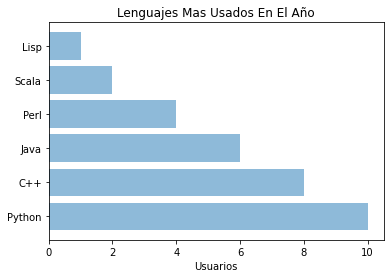

In [59]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

lenguajes = ['Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp']
#Obtenemos una lista con las posiciones de cada lenguaje, ejemplo 0, 1, 2, 3.....
y_pos = np.arange(len(lenguajes))

#Ahora obtenemos la cantidad de usos de cada lenguaje
cantidad_usos = [10,8,6,4,2,1]

#Creamos la grafica pasando los valores en el eje X, Y, donde X = cantidad_usos y Y = lenguajes
plt.barh(y_pos, cantidad_usos, align='center', alpha=0.5)
#Añadimos la etiqueta de nombre de cada lenguaje en su posicion correcta
plt.yticks(y_pos, lenguajes)
#añadimos una etiqueta en el eje X
plt.xlabel('Usuarios')
#Y una etiqueta superior
plt.title('Lenguajes Mas Usados En El Año')
plt.savefig('barras_horizontal.png')
plt.show()

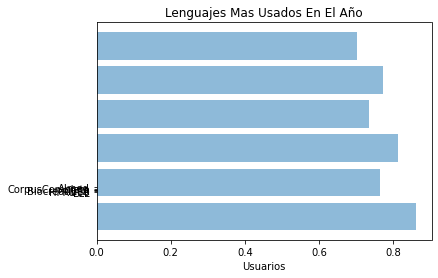

In [60]:
lenguajes = ['Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp']
#Obtenemos una lista con las posiciones de cada lenguaje, ejemplo 0, 1, 2, 3.....
y_pos = np.arange(len(df_KNN_NB_RF["Accuracy"]))

#Ahora obtenemos la cantidad de usos de cada lenguaje
cantidad_usos = [10,8,6,4,2,1]

#Creamos la grafica pasando los valores en el eje X, Y, donde X = cantidad_usos y Y = lenguajes
plt.barh(y_pos, df_KNN_NB_RF["Accuracy"], align='center', alpha=0.5)
#Añadimos la etiqueta de nombre de cada lenguaje en su posicion correcta
plt.yticks(df_KNN_NB_RF["Accuracy"], df_KNN_NB_RF["Corpus"])
#añadimos una etiqueta en el eje X
plt.xlabel('Usuarios')
#Y una etiqueta superior
plt.title('Lenguajes Mas Usados En El Año')
plt.savefig('barras_horizontal.png')
plt.show()

<AxesSubplot:>

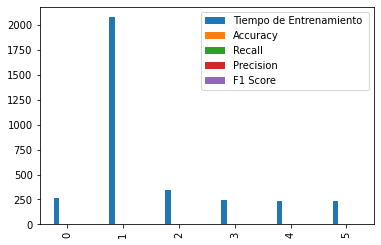

In [61]:
df_KNN_NB_RF.plot(kind = 'bar')


In [62]:
df_KNN_NB_RF.plot(kind = 'barh');


# Mejores resultados TFIDF - Cls

In [63]:
rutas_cls_NB = MejoresResultadosClasificadorV1("NB")
MejoresResultadosRepresentacionCorpus(cls = "NB", representacion = rutas_cls_NB[0] )

###################################
AImed
0.672
AImed_NB_TFIDF_Filtrado_spacy.txt
10.0
###################################
###################################
LLL
0.739
LLL_NB_TFIDF_InfoExtra_patrones.txt
85.0
###################################
###################################
Biocreative3
0.992
Biocreative3_NB_TFIDF_InfoExtra_spacy.txt
297.0
###################################
###################################
IEPA
0.864
IEPA_NB_TFIDF_InfoExtra_patrones.txt
12.0
###################################
###################################
CorpusCompleto
0.986
CorpusCompleto_NB_TFIDF_InfoExtra_spacy.txt
33.0
###################################
###################################
HPRD50
0.732
HPRD50_NB_TFIDF_InfoExtra_patrones.txt
9.0
###################################
###################################
Biocreative3NB
0.938
Biocreative3NB_TFIDFInfoExtra.txt
218.0
###################################
Nombre documento:  Biocreative3_NB_TFIDF_InfoExtra_spacy.txt
Mejor Accuracy:  0.9921343

('Biocreative3_NB_TFIDF_InfoExtra_spacy.txt', 0.9921343950281608)

In [64]:
rutas_cls_NB = MejoresResultadosClasificadorV1("SVM")
MejoresResultadosRepresentacionCorpus(cls = "SVM", representacion = rutas_cls_NB[0] )

###################################
CorpusCompleto
0.999
CorpusCompleto_SVM_TFIDF_InfoExtra_patrones.txt
490.0
###################################
###################################
IEPA
0.906
IEPA_SVM_TFIDF_InfoExtra_patrones.txt
195.0
###################################
###################################
LLL
0.85
LLL_SVM_TFIDF_InfoExtra_patrones.txt
5.0
###################################
###################################
AImed
0.909
AImed_SVM_TFIDF_InfoExtra_patrones.txt
59.0
###################################
###################################
Biocreative3SVM
0.955
Biocreative3SVM_TFIDFInfoExtra.txt
153.0
###################################
###################################
Biocreative3
0.996
Biocreative3_SVM_TFIDF_InfoExtra_spacy.txt
329.0
###################################
###################################
HPRD50
0.802
HPRD50_SVM_TFIDF_InfoExtra_patrones.txt
75.0
###################################
Nombre documento:  CorpusCompleto_SVM_TFIDF_InfoExtra_patrones.txt
Mejo

('CorpusCompleto_SVM_TFIDF_InfoExtra_patrones.txt', 0.9991007194244604)

In [65]:
rutas_cls_NB = MejoresResultadosClasificadorV1("KNN")
MejoresResultadosRepresentacionCorpus(cls = "KNN", representacion = rutas_cls_NB[0] )

###################################
HPRD50
0.812
HPRD50_KNN_TFIDF_InfoExtra_patrones.txt
73.0
###################################
###################################
LLL
0.809
LLL_KNN_TFIDF_InfoExtra_patrones.txt
12.0
###################################
###################################
CorpusCompleto
0.997
CorpusCompleto_KNN_TFIDF_InfoExtra_patrones.txt
489.0
###################################
###################################
IEPA
0.899
IEPA_KNN_TFIDF_InfoExtra_patrones.txt
13.0
###################################
###################################
Biocreative3
1.0
Biocreative3_KNN_TFIDF_InfoExtra_patrones.txt
199.0
###################################
###################################
AImed
0.91
AImed_KNN_TFIDF_InfoExtra_patrones.txt
448.0
###################################
Nombre documento:  Biocreative3_KNN_TFIDF_InfoExtra_patrones.txt
Mejor Accuracy:  0.9997757324842644


('Biocreative3_KNN_TFIDF_InfoExtra_patrones.txt', 0.9997757324842644)

In [66]:
rutas_cls_NB = MejoresResultadosClasificadorV1("RF")
MejoresResultadosRepresentacionCorpus(cls = "RF", representacion = rutas_cls_NB[0] )

###################################
IEPA
0.915
IEPA_RF_TFIDF_InfoExtra_patrones.txt
13.0
###################################
###################################
LLL
0.852
LLL_RF_TFIDF_InfoExtra_patrones.txt
4.0
###################################
###################################
Biocreative3
1.0
Biocreative3_RF_TFIDF_InfoExtra_patrones.txt
201.0
###################################
###################################
CorpusCompleto
0.999
CorpusCompleto_RF_TFIDF_InfoExtra_patrones.txt
492.0
###################################
###################################
HPRD50
0.84
HPRD50_RF_TFIDF_InfoExtra_patrones.txt
73.0
###################################
###################################
AImed
0.925
AImed_RF_TFIDF_InfoExtra_patrones.txt
452.0
###################################
Nombre documento:  Biocreative3_RF_TFIDF_InfoExtra_patrones.txt
Mejor Accuracy:  0.9999055715723218


('Biocreative3_RF_TFIDF_InfoExtra_patrones.txt', 0.9999055715723218)

# Mejores resultados TFIDF LEXICON - Cls

In [67]:
rutas_cls_NB = MejoresResultadosClasificadorV1("NB")
MejoresResultadosRepresentacionCorpus(cls = "NB", representacion = rutas_cls_NB[1] )

###################################
LLL
0.852
LLL_NB_TFIDF_LEXICON_InfoExtra_patrones.txt
82.0
###################################
###################################
CorpusCompleto
0.848
CorpusCompleto_NB_TFIDF_LEXICON_InfoExtra_patrones.txt
7251.0
###################################
###################################
HPRD50
0.804
HPRD50_NB_TFIDF_LEXICON_InfoExtra_patrones.txt
5.0
###################################
###################################
Biocreative3
0.665
Biocreative3_NB_TFIDF_LEXICON_Filtrado_spacy.txt
851.0
###################################
###################################
IEPA
0.894
IEPA_NB_TFIDF_LEXICON_InfoExtra_patrones.txt
12.0
###################################
###################################
AImed
0.787
AImed_NB_TFIDF_LEXICON_InfoExtra_patrones.txt
110.0
###################################
Nombre documento:  IEPA_NB_TFIDF_LEXICON_InfoExtra_patrones.txt
Mejor Accuracy:  0.8937685459940653


('IEPA_NB_TFIDF_LEXICON_InfoExtra_patrones.txt', 0.8937685459940653)

In [68]:
rutas_cls_NB = MejoresResultadosClasificadorV1("SVM")
MejoresResultadosRepresentacionCorpus(cls = "SVM", representacion = rutas_cls_NB[1] )

###################################
AImed
0.935
AImed_SVM_TFIDF_LEXICON_InfoExtra_patrones.txt
1542.0
###################################
###################################
Biocreative3
0.753
Biocreative3_SVM_TFIDF_LEXICON_NoFiltrado.txt
6297.0
###################################
###################################
IEPA
0.907
IEPA_SVM_TFIDF_LEXICON_InfoExtra_patrones.txt
8.0
###################################
###################################
CorpusCompleto
0.854
CorpusCompleto_SVM_TFIDF_LEXICON_Filtrado_spacy.txt
485.0
###################################
###################################
HPRD50
0.83
HPRD50_SVM_TFIDF_LEXICON_InfoExtra_patrones.txt
11.0
###################################
###################################
LLL
0.85
LLL_SVM_TFIDF_LEXICON_InfoExtra_patrones.txt
14.0
###################################
Nombre documento:  AImed_SVM_TFIDF_LEXICON_InfoExtra_patrones.txt
Mejor Accuracy:  0.9345252476443585


('AImed_SVM_TFIDF_LEXICON_InfoExtra_patrones.txt', 0.9345252476443585)

In [69]:
rutas_cls_NB = MejoresResultadosClasificadorV1("KNN")
MejoresResultadosRepresentacionCorpus(cls = "KNN", representacion = rutas_cls_NB[1] )

###################################
IEPA
0.888
IEPA_KNN_TFIDF_LEXICON_InfoExtra_patrones.txt
16.0
###################################
###################################
CorpusCompleto
0.995
CorpusCompleto_KNN_TFIDF_LEXICON_InfoExtra_patrones.txt
51.0
###################################
###################################
HPRD50
0.793
HPRD50_KNN_TFIDF_LEXICON_InfoExtra_patrones.txt
11.0
###################################
###################################
Biocreative3
0.684
Biocreative3_KNN_TFIDF_LEXICON_NoFiltrado.txt
606.0
###################################
###################################
LLL
0.816
LLL_KNN_TFIDF_LEXICON_InfoExtra_patrones.txt
8.0
###################################
###################################
AImed
0.936
AImed_KNN_TFIDF_LEXICON_InfoExtra_patrones.txt
221.0
###################################
Nombre documento:  CorpusCompleto_KNN_TFIDF_LEXICON_InfoExtra_patrones.txt
Mejor Accuracy:  0.9949468996231586


('CorpusCompleto_KNN_TFIDF_LEXICON_InfoExtra_patrones.txt', 0.9949468996231586)

In [70]:
rutas_cls_NB = MejoresResultadosClasificadorV1("RF")
MejoresResultadosRepresentacionCorpus(cls = "RF", representacion = rutas_cls_NB[1] )

###################################
CorpusCompleto
0.999
CorpusCompleto_RF_TFIDF_LEXICON_InfoExtra_patrones.txt
79.0
###################################
###################################
AImed
0.973
AImed_RF_TFIDF_LEXICON_InfoExtra_patrones.txt
18.0
###################################
###################################
LLL
0.847
LLL_RF_TFIDF_LEXICON_InfoExtra_patrones.txt
22.0
###################################
###################################
HPRD50
0.84
HPRD50_RF_TFIDF_LEXICON_InfoExtra_patrones.txt
13.0
###################################
###################################
IEPA
0.916
IEPA_RF_TFIDF_LEXICON_InfoExtra_patrones.txt
23.0
###################################
###################################
Biocreative3
0.815
Biocreative3_RF_TFIDF_LEXICON_NoFiltrado.txt
758.0
###################################
Nombre documento:  CorpusCompleto_RF_TFIDF_LEXICON_InfoExtra_patrones.txt
Mejor Accuracy:  0.9994861253854059


('CorpusCompleto_RF_TFIDF_LEXICON_InfoExtra_patrones.txt', 0.9994861253854059)

# Mejores resultados WEMB - Cls

In [71]:
rutas_cls_NB = MejoresResultadosClasificadorV1("NB")
MejoresResultadosRepresentacionCorpus(cls = "NB", representacion = rutas_cls_NB[2] )

###################################
Biocreative3
0.8
Biocreative3_NB_WEMB_Filtrado_patrones.txt
6362.0
###################################
###################################
LLL
0.724
LLL_NB_WEMB_InfoExtra_patrones.txt
97.0
###################################
###################################
HPRD50
0.718
HPRD50_NB_WEMB_InfoExtra_patrones.txt
7.0
###################################
###################################
CorpusCompleto
0.834
CorpusCompleto_NB_WEMB_InfoExtra_spacy.txt
3709.0
###################################
###################################
IEPA
0.777
IEPA_NB_WEMB_InfoExtra_patrones.txt
12.0
###################################
###################################
AImed
0.851
AImed_NB_WEMB_InfoExtra_spacy.txt
8.0
###################################
Nombre documento:  AImed_NB_WEMB_InfoExtra_spacy.txt
Mejor Accuracy:  0.850632911392405


('AImed_NB_WEMB_InfoExtra_spacy.txt', 0.850632911392405)

In [72]:
rutas_cls_NB = MejoresResultadosClasificadorV1("SVM")
MejoresResultadosRepresentacionCorpus(cls = "SVM", representacion = rutas_cls_NB[2] )

###################################
LLL
0.837
LLL_SVM_WEMB_InfoExtra_patrones.txt
22.0
###################################
###################################
HPRD50
0.796
HPRD50_SVM_WEMB_InfoExtra_patrones.txt
12.0
###################################
###################################
AImed
0.891
AImed_SVM_WEMB_Filtrado_spacy.txt
104.0
###################################
###################################
Biocreative3
0.859
Biocreative3_SVM_WEMB_InfoExtra_spacy.txt
6724.0
###################################
###################################
IEPA
0.853
IEPA_SVM_WEMB_InfoExtra_patrones.txt
4.0
###################################
###################################
CorpusCompleto
0.964
CorpusCompleto_SVM_WEMB_InfoExtra_patrones.txt
41.0
###################################
Nombre documento:  CorpusCompleto_SVM_WEMB_InfoExtra_patrones.txt
Mejor Accuracy:  0.9636433710174718


('CorpusCompleto_SVM_WEMB_InfoExtra_patrones.txt', 0.9636433710174718)

In [73]:
rutas_cls_NB = MejoresResultadosClasificadorV1("KNN")
MejoresResultadosRepresentacionCorpus(cls = "KNN", representacion = rutas_cls_NB[2] )

###################################
AImed
0.865
AImed_KNN_WEMB_InfoExtra_patrones.txt
53.0
###################################
###################################
LLL
0.705
LLL_KNN_WEMB_InfoExtra_spacy.txt
102.0
###################################
###################################
CorpusCompleto
0.819
CorpusCompleto_KNN_WEMB_InfoExtra_spacy.txt
3842.0
###################################
###################################
HPRD50
0.657
HPRD50_KNN_WEMB_Filtrado_patrones.txt
9.0
###################################
###################################
Biocreative3
0.699
Biocreative3_KNN_WEMB_NoFiltrado.txt
188.0
###################################
###################################
IEPA
0.793
IEPA_KNN_WEMB_InfoExtra_spacy.txt
9.0
###################################
Nombre documento:  AImed_KNN_WEMB_InfoExtra_patrones.txt
Mejor Accuracy:  0.8649432230007248


('AImed_KNN_WEMB_InfoExtra_patrones.txt', 0.8649432230007248)

In [74]:
rutas_cls_NB = MejoresResultadosClasificadorV1("RF")
MejoresResultadosRepresentacionCorpus(cls = "RF", representacion = rutas_cls_NB[2] )

###################################
HPRD50
0.84
HPRD50_RF_WEMB_InfoExtra_patrones.txt
3.0
###################################
###################################
CorpusCompleto
0.999
CorpusCompleto_RF_WEMB_InfoExtra_patrones.txt
26.0
###################################
###################################
Biocreative3
0.996
Biocreative3_RF_WEMB_InfoExtra_spacy.txt
189.0
###################################
###################################
IEPA
0.915
IEPA_RF_WEMB_InfoExtra_patrones.txt
11.0
###################################
###################################
AImed
0.919
AImed_RF_WEMB_InfoExtra_patrones.txt
8.0
###################################
###################################
LLL
0.852
LLL_RF_WEMB_InfoExtra_patrones.txt
95.0
###################################
Nombre documento:  CorpusCompleto_RF_WEMB_InfoExtra_patrones.txt
Mejor Accuracy:  0.9992291880781089


('CorpusCompleto_RF_WEMB_InfoExtra_patrones.txt', 0.9992291880781089)

# Mejores resultados WEMB LEXICON - Cls

In [75]:
rutas_cls_NB = MejoresResultadosClasificadorV1("NB")
MejoresResultadosRepresentacionCorpus(cls = "NB", representacion = rutas_cls_NB[3] )

###################################
HPRD50
0.73
HPRD50_NB_WEMB_LEXICON_InfoExtra_patrones.txt
12.0
###################################
###################################
Biocreative3
0.792
Biocreative3_NB_WEMB_LEXICON_Filtrado_patrones.txt
596.0
###################################
###################################
AImed
0.853
AImed_NB_WEMB_LEXICON_InfoExtra_spacy.txt
18.0
###################################
###################################
CorpusCompleto
0.832
CorpusCompleto_NB_WEMB_LEXICON_InfoExtra_spacy.txt
52.0
###################################
###################################
IEPA
0.779
IEPA_NB_WEMB_LEXICON_InfoExtra_patrones.txt
32.0
###################################
###################################
LLL
0.724
LLL_NB_WEMB_LEXICON_InfoExtra_patrones.txt
175.0
###################################
Nombre documento:  AImed_NB_WEMB_LEXICON_InfoExtra_spacy.txt
Mejor Accuracy:  0.8531645569620253


('AImed_NB_WEMB_LEXICON_InfoExtra_spacy.txt', 0.8531645569620253)

In [76]:
rutas_cls_NB = MejoresResultadosClasificadorV1("SVM")
MejoresResultadosRepresentacionCorpus(cls = "SVM", representacion = rutas_cls_NB[3] )

###################################
CorpusCompleto
0.842
CorpusCompleto_SVM_WEMB_LEXICON_Filtrado_patrones.txt
105.0
###################################
###################################
HPRD50
0.799
HPRD50_SVM_WEMB_LEXICON_InfoExtra_patrones.txt
18.0
###################################
###################################
AImed
0.891
AImed_SVM_WEMB_LEXICON_Filtrado_spacy.txt
351.0
###################################
###################################
LLL
0.838
LLL_SVM_WEMB_LEXICON_InfoExtra_patrones.txt
15.0
###################################
###################################
IEPA
0.83
IEPA_SVM_WEMB_LEXICON_Filtrado_spacy.txt
7.0
###################################
###################################
Biocreative3
0.861
Biocreative3_SVM_WEMB_LEXICON_NoFiltrado.txt
2359.0
###################################
Nombre documento:  AImed_SVM_WEMB_LEXICON_Filtrado_spacy.txt
Mejor Accuracy:  0.8905109489051095


('AImed_SVM_WEMB_LEXICON_Filtrado_spacy.txt', 0.8905109489051095)

In [77]:
rutas_cls_NB = MejoresResultadosClasificadorV1("KNN")
MejoresResultadosRepresentacionCorpus(cls = "KNN", representacion = rutas_cls_NB[3] )

###################################
HPRD50
0.717
HPRD50_KNN_WEMB_LEXICON_InfoExtra_spacy.txt
39.0
###################################
###################################
LLL
0.704
LLL_KNN_WEMB_LEXICON_Filtrado_spacy.txt
5.0
###################################
###################################
CorpusCompleto
0.787
CorpusCompleto_KNN_WEMB_LEXICON_InfoExtra_spacy.txt
1875.0
###################################
###################################
IEPA
0.792
IEPA_KNN_WEMB_LEXICON_Filtrado_spacy.txt
32.0
###################################
###################################
AImed
0.876
AImed_KNN_WEMB_LEXICON_Filtrado_spacy.txt
252.0
###################################
###################################
Biocreative3
0.672
Biocreative3_KNN_WEMB_LEXICON_Filtrado_patrones.txt
845.0
###################################
Nombre documento:  AImed_KNN_WEMB_LEXICON_Filtrado_spacy.txt
Mejor Accuracy:  0.8759124087591241


('AImed_KNN_WEMB_LEXICON_Filtrado_spacy.txt', 0.8759124087591241)

In [78]:
rutas_cls_NB = MejoresResultadosClasificadorV1("RF")
MejoresResultadosRepresentacionCorpus(cls = "RF", representacion = rutas_cls_NB[3] )

###################################
HPRD50
0.84
HPRD50_RF_WEMB_LEXICON_InfoExtra_patrones.txt
150.0
###################################
###################################
AImed
0.869
AImed_RF_WEMB_LEXICON_Filtrado_spacy.txt
18.0
###################################
###################################
LLL
0.852
LLL_RF_WEMB_LEXICON_InfoExtra_patrones.txt
169.0
###################################
###################################
CorpusCompleto
0.995
CorpusCompleto_RF_WEMB_LEXICON_InfoExtra_spacy.txt
65.0
###################################
###################################
IEPA
0.917
IEPA_RF_WEMB_LEXICON_InfoExtra_patrones.txt
32.0
###################################
###################################
Biocreative3
0.834
Biocreative3_RF_WEMB_LEXICON_NoFiltrado.txt
343.0
###################################
Nombre documento:  CorpusCompleto_RF_WEMB_LEXICON_InfoExtra_spacy.txt
Mejor Accuracy:  0.9950980392156863


('CorpusCompleto_RF_WEMB_LEXICON_InfoExtra_spacy.txt', 0.9950980392156863)

# Mejores resultados WEMB LEXICON TFIDF - Cls

In [79]:
print("NB")
rutas_cls_NB = MejoresResultadosClasificadorV1("NB")
MejoresResultadosRepresentacionCorpus(cls = "NB", representacion = rutas_cls_NB[4] )
print("#############################################################")
print("SVM")
rutas_cls_NB = MejoresResultadosClasificadorV1("SVM")
MejoresResultadosRepresentacionCorpus(cls = "SVM", representacion = rutas_cls_NB[4] )
print("#############################################################")
print("KNN")
rutas_cls_NB = MejoresResultadosClasificadorV1("KNN")
MejoresResultadosRepresentacionCorpus(cls = "KNN", representacion = rutas_cls_NB[4] )
print("#############################################################")
print("RF")
rutas_cls_NB = MejoresResultadosClasificadorV1("RF")
MejoresResultadosRepresentacionCorpus(cls = "RF", representacion = rutas_cls_NB[4] )
print("#############################################################")


NB
###################################
CorpusCompleto
0.599
CorpusCompleto_NB_WEMB_LEXICON_TFIDF_NoFiltrado.txt
146.0
###################################
###################################
Biocreative3
0.676
Biocreative3_NB_WEMB_LEXICON_TFIDF_Filtrado_spacy.txt
518.0
###################################
###################################
LLL
0.645
LLL_NB_WEMB_LEXICON_TFIDF_Filtrado_patrones.txt
7.0
###################################
###################################
IEPA
0.755
IEPA_NB_WEMB_LEXICON_TFIDF_Filtrado_spacy.txt
10.0
###################################
###################################
AImed
0.787
AImed_NB_WEMB_LEXICON_TFIDF_InfoExtra_patrones.txt
553.0
###################################
###################################
HPRD50
0.735
HPRD50_NB_WEMB_LEXICON_TFIDF_Filtrado_patrones.txt
24.0
###################################
Nombre documento:  AImed_NB_WEMB_LEXICON_TFIDF_InfoExtra_patrones.txt
Mejor Accuracy:  0.7871466537811066
#######################################

# Mejores resultados MULTIPLE TFIDF - Cls

In [80]:
#print("NB")
#rutas_cls_NB = MejoresResultadosClasificadorV1("NB")
#MejoresResultadosRepresentacionCorpus(cls = "NB", representacion = rutas_cls_NB[5] )
print("#############################################################")
print("SVM")
rutas_cls_NB = MejoresResultadosClasificadorV1("SVM")
MejoresResultadosRepresentacionCorpus(cls = "SVM", representacion = rutas_cls_NB[5] )
#print("#############################################################")
#print("KNN")
#rutas_cls_NB = MejoresResultadosClasificadorV1("KNN")
#MejoresResultadosRepresentacionCorpus(cls = "KNN", representacion = rutas_cls_NB[5] )
#print("#############################################################")
#print("RF")
#rutas_cls_NB = MejoresResultadosClasificadorV1("RF")
#MejoresResultadosRepresentacionCorpus(cls = "RF", representacion = rutas_cls_NB[5] )
#print("#############################################################")


#############################################################
SVM
###################################
Biocreative3
0.851
Biocreative3_SVM_MULTIPLE_TFIDF_NoFiltrado.txt
6169.0
###################################
###################################
AImed
0.876
AImed_SVM_MULTIPLE_TFIDF_Filtrado_spacy.txt
203.0
###################################
###################################
LLL
0.71
LLL_SVM_MULTIPLE_TFIDF_Filtrado_patrones.txt
440.0
###################################
###################################
CorpusCompleto
0.837
CorpusCompleto_SVM_MULTIPLE_TFIDF_Filtrado_spacy.txt
432.0
###################################
###################################
IEPA
0.755
IEPA_SVM_MULTIPLE_TFIDF_Filtrado_spacy.txt
499.0
###################################
###################################
HPRD50
0.765
HPRD50_SVM_MULTIPLE_TFIDF_Filtrado_patrones.txt
1869.0
###################################
Nombre documento:  AImed_SVM_MULTIPLE_TFIDF_Filtrado_spacy.txt
Mejor Accuracy:  0.8759124087591241


('AImed_SVM_MULTIPLE_TFIDF_Filtrado_spacy.txt', 0.8759124087591241)

# Mejores resultados MULTIPLE WEMB - Cls

In [81]:
#print("NB")
#rutas_cls_NB = MejoresResultadosClasificadorV1("NB")
#MejoresResultadosRepresentacionCorpus(cls = "NB", representacion = rutas_cls_NB[6] )
print("#############################################################")
print("SVM")
rutas_cls_NB = MejoresResultadosClasificadorV1("SVM")
MejoresResultadosRepresentacionCorpus(cls = "SVM", representacion = rutas_cls_NB[6] )
#print("#############################################################")
#print("KNN")
#rutas_cls_NB = MejoresResultadosClasificadorV1("KNN")
#MejoresResultadosRepresentacionCorpus(cls = "KNN", representacion = rutas_cls_NB[6] )
#print("#############################################################")
#print("RF")
#rutas_cls_NB = MejoresResultadosClasificadorV1("RF")
#MejoresResultadosRepresentacionCorpus(cls = "RF", representacion = rutas_cls_NB[6] )
#print("#############################################################")


#############################################################
SVM
###################################
Biocreative3
0.858
Biocreative3_SVM_MULTIPLE_WEMB_NoFiltrado.txt
2585.0
###################################
###################################
LLL
0.704
LLL_SVM_MULTIPLE_WEMB_Filtrado_spacy.txt
208.0
###################################
###################################
CorpusCompleto
0.842
CorpusCompleto_SVM_MULTIPLE_WEMB_Filtrado_patrones.txt
271.0
###################################
###################################
AImed
0.891
AImed_SVM_MULTIPLE_WEMB_Filtrado_spacy.txt
245.0
###################################
###################################
IEPA
0.83
IEPA_SVM_MULTIPLE_WEMB_Filtrado_spacy.txt
1643.0
###################################
###################################
HPRD50
0.676
HPRD50_SVM_MULTIPLE_WEMB_Filtrado_patrones.txt
511.0
###################################
Nombre documento:  AImed_SVM_MULTIPLE_WEMB_Filtrado_spacy.txt
Mejor Accuracy:  0.8905109489051095


('AImed_SVM_MULTIPLE_WEMB_Filtrado_spacy.txt', 0.8905109489051095)

# Mejores resultados LEXICON - Cls

In [82]:
print("NB")
rutas_cls_NB = MejoresResultadosClasificadorV1("NB")
MejoresResultadosRepresentacionCorpus(cls = "NB", representacion = rutas_cls_NB[7] )
print("#############################################################")
print("SVM")
rutas_cls_NB = MejoresResultadosClasificadorV1("SVM")
MejoresResultadosRepresentacionCorpus(cls = "SVM", representacion = rutas_cls_NB[7] )
print("#############################################################")
print("KNN")
rutas_cls_NB = MejoresResultadosClasificadorV1("KNN")
MejoresResultadosRepresentacionCorpus(cls = "KNN", representacion = rutas_cls_NB[7] )
print("#############################################################")
print("RF")
rutas_cls_NB = MejoresResultadosClasificadorV1("RF")
MejoresResultadosRepresentacionCorpus(cls = "RF", representacion = rutas_cls_NB[7] )
print("#############################################################")


NB
###################################
HPRD50
0.63
HPRD50_NB_LEXICON_Filtrado_spacy.txt
6.0
###################################
###################################
AImed
0.898
AImed_NB_LEXICON_Filtrado_spacy.txt
103.0
###################################
###################################
IEPA
0.736
IEPA_NB_LEXICON_Filtrado_spacy.txt
3.0
###################################
###################################
CorpusCompleto
0.779
CorpusCompleto_NB_LEXICON_Filtrado_spacy.txt
35.0
###################################
###################################
LLL
0.704
LLL_NB_LEXICON_Filtrado_spacy.txt
4.0
###################################
###################################
Biocreative3
0.719
Biocreative3_NB_LEXICON_NoFiltrado.txt
312.0
###################################
Nombre documento:  AImed_NB_LEXICON_Filtrado_spacy.txt
Mejor Accuracy:  0.8978102189781022
#############################################################
SVM
###################################
AImed
0.891
AImed_SVM_LEXICON_Fi

In [83]:
def MejoresResultadosRepresentacion(cls, representacion):
    max_acc = 0 
    doc = ""
    for i in representacion:
        f = open(f'{cls}/{i}','r')
        acc = list(f)[0].split(" ")
        acc = float(acc[2]) 
        if acc > max_acc:
            max_acc = acc
        doc = i
    print("Nombre documento: ", doc) 
    print("Mejor Accuracy: ", max_acc) 
    return doc, max_acc
    

In [84]:
def MejoresResultadosClasificador(cls):
    TFIDF_LEXICON = []
    TFIDF = []
    WEMB_LEXICON_TFIDF = []
    WEMB_LEXICON = []
    WEMB = []
    
    resultados = os.listdir(f"{cls}/")

    for i in resultados:
        if "TFIDF_LEXICON" in i:
            TFIDF_LEXICON.append(i)
        elif "WEMB_LEXICON_TFIDF" in i:
            WEMB_LEXICON_TFIDF.append(i)
        elif "WEMB_LEXICON" in i:
            WEMB_LEXICON.append(i)
        elif "WEMB" in i:
            WEMB.append(i)
        elif "TFIDF" in i:
            TFIDF.append(i)
    print("#############################################")
    print("Mejores resultados TFIDF")
    MejoresResultadosRepresentacion(cls = cls, representacion = TFIDF )
    print("#############################################")
    
    print("#############################################")
    print("Mejores resultados TFIDF_LEXICON")
    MejoresResultadosRepresentacion(cls = cls, representacion = TFIDF_LEXICON )
    print("#############################################")
    
    print("#############################################")
    print("Mejores resultados WEMB")
    MejoresResultadosRepresentacion(cls = cls, representacion = WEMB )
    print("#############################################")
    
    print("#############################################")
    print("Mejores resultados WEMB_LEXICON")
    MejoresResultadosRepresentacion(cls = cls, representacion = WEMB_LEXICON )
    print("#############################################")
    
    print("#############################################")
    print("Mejores resultados WEMB_LEXICON_TFIDF")
    MejoresResultadosRepresentacion(cls = cls, representacion = WEMB_LEXICON_TFIDF )
    print("#############################################")

In [85]:
MejoresResultadosClasificador("KNN")

#############################################
Mejores resultados TFIDF
Nombre documento:  AImed_KNN_TFIDF_Filtrado_patrones.txt
Mejor Accuracy:  0.9997757324842644
#############################################
#############################################
Mejores resultados TFIDF_LEXICON
Nombre documento:  Biocreative3_KNN_TFIDF_LEXICON_NoFiltrado.txt
Mejor Accuracy:  0.9949468996231586
#############################################
#############################################
Mejores resultados WEMB
Nombre documento:  HPRD50_KNN_MULTIPLE_WEMB_Filtrado_spacy.txt
Mejor Accuracy:  0.8649432230007248
#############################################
#############################################
Mejores resultados WEMB_LEXICON
Nombre documento:  LLL_KNN_WEMB_LEXICON_NoFiltrado.txt
Mejor Accuracy:  0.8759124087591241
#############################################
#############################################
Mejores resultados WEMB_LEXICON_TFIDF
Nombre documento:  CorpusCompleto_KNN_WEMB_LEXICON

In [86]:
MejoresResultadosClasificador("SVM")

#############################################
Mejores resultados TFIDF
Nombre documento:  IEPA_SVM_TFIDF_Filtrado_patrones.txt
Mejor Accuracy:  0.9991007194244604
#############################################
#############################################
Mejores resultados TFIDF_LEXICON
Nombre documento:  HPRD50_SVM_TFIDF_LEXICON_InfoExtra_spacy.txt
Mejor Accuracy:  0.9345252476443585
#############################################
#############################################
Mejores resultados WEMB
Nombre documento:  LLL_SVM_WEMB_InfoExtra_patrones.txt
Mejor Accuracy:  0.9636433710174718
#############################################
#############################################
Mejores resultados WEMB_LEXICON
Nombre documento:  Biocreative3_SVM_WEMB_LEXICON_Filtrado_patrones.txt
Mejor Accuracy:  0.8905109489051095
#############################################
#############################################
Mejores resultados WEMB_LEXICON_TFIDF
Nombre documento:  HPRD50_SVM_WEMB_LEXICON_T

In [87]:
MejoresResultadosClasificador("NB")

#############################################
Mejores resultados TFIDF
Nombre documento:  Biocreative3_NB_TFIDF_Filtrado_spacy.txt
Mejor Accuracy:  0.9921343950281608
#############################################
#############################################
Mejores resultados TFIDF_LEXICON
Nombre documento:  LLL_NB_TFIDF_LEXICON_InfoExtra_spacy.txt
Mejor Accuracy:  0.8937685459940653
#############################################
#############################################
Mejores resultados WEMB
Nombre documento:  HPRD50_NB_MULTIPLE_WEMB_NoFiltrado.txt
Mejor Accuracy:  0.850632911392405
#############################################
#############################################
Mejores resultados WEMB_LEXICON
Nombre documento:  LLL_NB_WEMB_LEXICON_NoFiltrado.txt
Mejor Accuracy:  0.8531645569620253
#############################################
#############################################
Mejores resultados WEMB_LEXICON_TFIDF
Nombre documento:  IEPA_NB_WEMB_LEXICON_TFIDF_Filtrado_patr

In [88]:
MejoresResultadosClasificador("RF")

#############################################
Mejores resultados TFIDF
Nombre documento:  Biocreative3_RF_TFIDF_InfoExtra_patrones.txt
Mejor Accuracy:  0.9999055715723218
#############################################
#############################################
Mejores resultados TFIDF_LEXICON
Nombre documento:  AImed_RF_TFIDF_LEXICON_NoFiltrado.txt
Mejor Accuracy:  0.9994861253854059
#############################################
#############################################
Mejores resultados WEMB
Nombre documento:  Biocreative3_RF_WEMB_NoFiltrado.txt
Mejor Accuracy:  0.9992291880781089
#############################################
#############################################
Mejores resultados WEMB_LEXICON
Nombre documento:  CorpusCompleto_RF_WEMB_LEXICON_InfoExtra_spacy.txt
Mejor Accuracy:  0.9950980392156863
#############################################
#############################################
Mejores resultados WEMB_LEXICON_TFIDF
Nombre documento:  CorpusCompleto_RF_WEMB_LE